<a href="https://colab.research.google.com/github/a01194850-cmd/Actividad-7-Bloomberg/blob/main/Clase_7_20_de_octubre_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== SINGLE REGRESSION ANALYSIS: PEPSICO vs COCA-COLA ===

Step 1: Uploading Excel files...
Please upload the following files:
- PEP.xlsx (PepsiCo weekly closing prices)
- KO.xlsx (Coca-Cola weekly closing prices)


Saving KO.xlsx to KO (8).xlsx
Saving PEP.xlsx to PEP (9).xlsx

Step 2: Loading files...

🔍 Columns in PEP.xlsx: ['Fecha', 'Last Price']
✓ PEP.xlsx: 277 rows loaded
   Date range: 2020-02-10 to 2025-12-09
   Sample data:
        Date   Close
0 2020-02-10  138.06
1 2020-04-09  138.76
2 2020-04-12  145.85


🔍 Columns in KO.xlsx: ['Fecha', 'Last Price']
✓ KO.xlsx: 277 rows loaded
   Date range: 2020-02-10 to 2025-12-09
   Sample data:
        Date  Close
0 2020-02-10  49.36
1 2020-04-09  51.04
2 2020-04-12  53.85


✓ Both files loaded successfully!

Step 3: Checking for identical data...

Step 4: Merging data on common dates...
✓ Merged dataset: 277 common weeks
   Date range: 2020-02-10 to 2025-12-09

Sample data (first 5 rows):
        Date  PEP_Close  KO_Close
0 2020-02-10     138.06     49.36
1 2020-04-09     138.76     51.04
2 2020-04-12     145.85     53.85
3 2020-06-11     138.38     49.45
4 2020-07-08     136.74     47.80

Step 5: Checking data quality...

Step 6: BUILDING SINGLE R

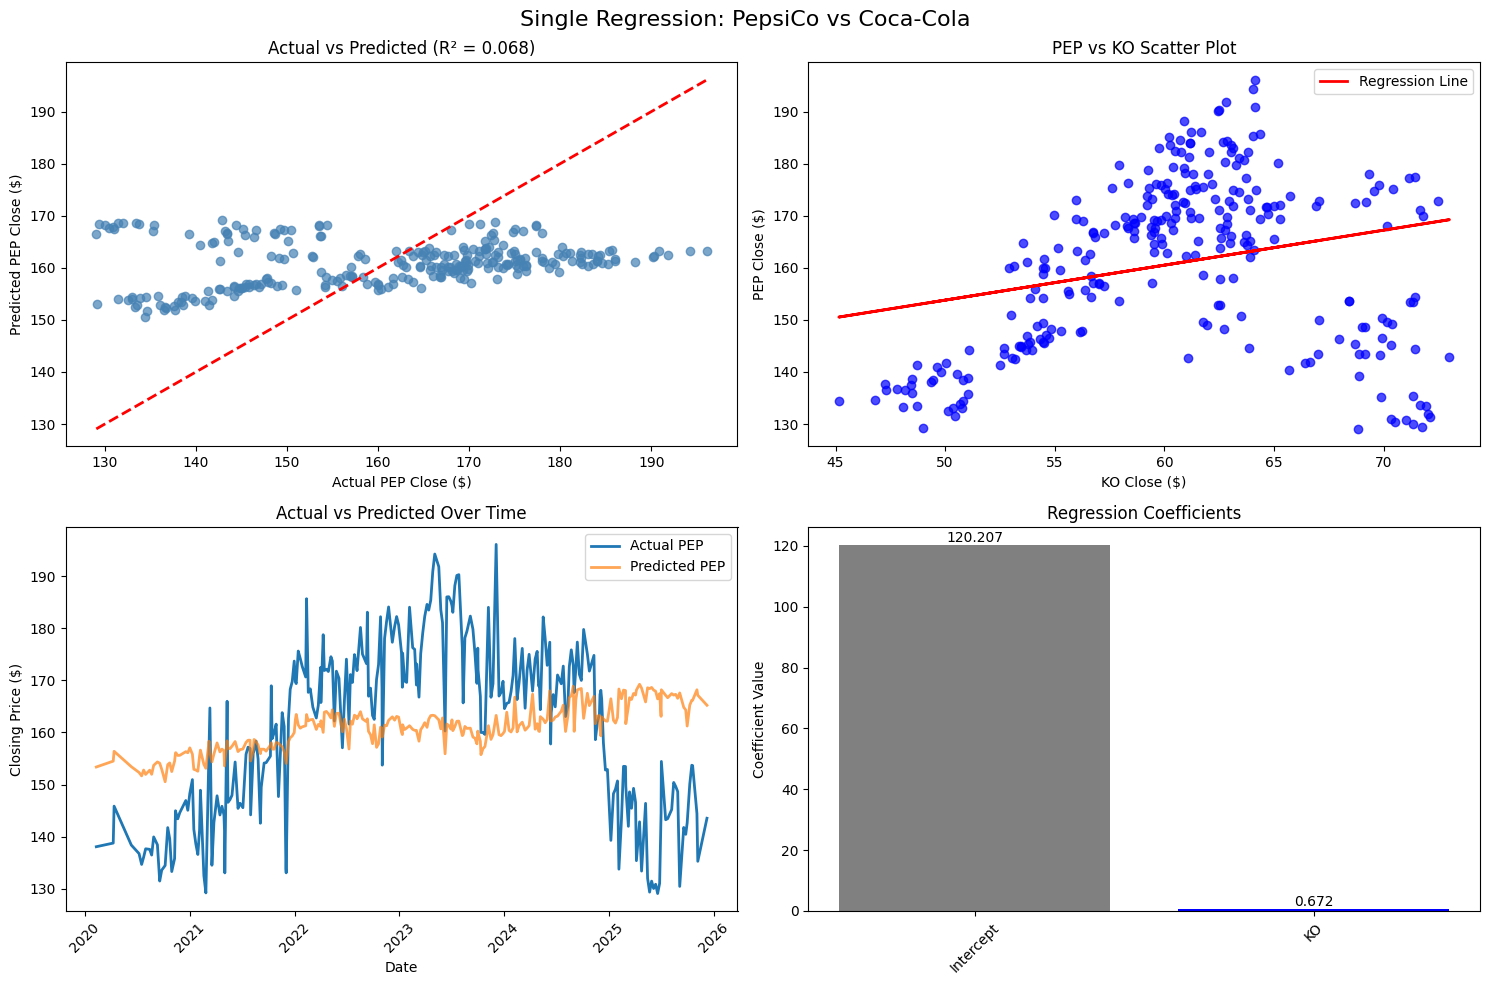


CORRELATION ANALYSIS
Correlation (PEP vs KO): 0.2603


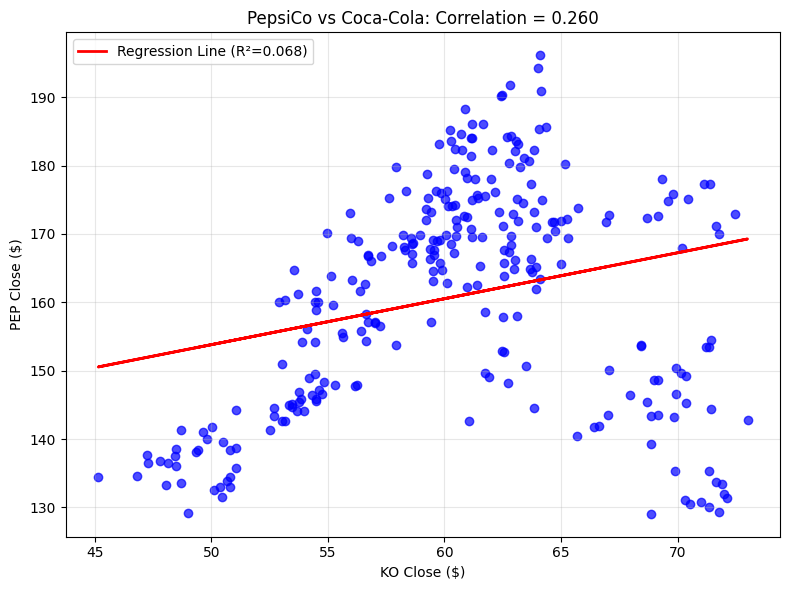


STATISTICAL SIGNIFICANCE
KO_Close: β₁ = 0.6719, p = 0.0000
✓ KO is a **SIGNIFICANT** predictor of PEP (p < 0.05)

INTERPRETATION:
• For every $1 increase in KO price, PEP price changes by $0.6719
• KO explains 6.8% of PEP price variation

SAVING RESULTS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ FILES DOWNLOADED:
   • pepsico_vs_coca_cola_regression.xlsx
   • pepsico_coca_cola_regression_summary.txt

🎉 SINGLE REGRESSION ANALYSIS COMPLETE!


In [ ]:
# Install required libraries (run once)
!pip install pandas openpyxl statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("=== SINGLE REGRESSION ANALYSIS: PEPSICO vs COCA-COLA ===")
print()

# Step 1: UPLOAD EXCEL FILES
print("Step 1: Uploading Excel files...")
print("Please upload the following files:")
print("- PEP.xlsx (PepsiCo weekly closing prices)")
print("- KO.xlsx (Coca-Cola weekly closing prices)")

# Upload files
uploaded = files.upload()

# Step 2: LOAD AND PROCESS DATA
def load_excel_data(filename, sheet_name=0):
    """
    Load Excel file with 'Fecha' and 'Last Price' columns, MM/DD/YYYY format, unsorted dates
    """
    try:
        # Read Excel file
        df = pd.read_excel(filename, sheet_name=sheet_name)

        # Print available columns for debugging
        print(f"\n🔍 Columns in {filename}: {list(df.columns)}")

        # Check for expected columns
        if 'Fecha' not in df.columns or 'Last Price' not in df.columns:
            raise ValueError(f"Expected columns 'Fecha' and 'Last Price' in {filename}. Found: {list(df.columns)}")

        # Select and rename columns to standard 'Date' and 'Close'
        df = df[['Fecha', 'Last Price']].copy()
        df.columns = ['Date', 'Close']

        # Convert to datetime with MM/DD/YYYY format
        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

        # Check for invalid dates
        if df['Date'].isna().any():
            invalid_rows = df[df['Date'].isna()]
            raise ValueError(f"Invalid dates found in {filename}:\n{invalid_rows}")

        # Remove any rows with missing data
        df = df.dropna()

        # Sort by date (files are unsorted)
        df = df.sort_values('Date').reset_index(drop=True)

        print(f"✓ {filename}: {len(df)} rows loaded")
        print(f"   Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        print(f"   Sample data:\n{df.head(3)}\n")

        return df
    except Exception as e:
        print(f"❌ Error loading {filename}: {str(e)}")
        return None

# Load files
print("\nStep 2: Loading files...")
pep_data = load_excel_data('PEP.xlsx')
ko_data = load_excel_data('KO.xlsx')

if pep_data is not None and ko_data is not None:
    print("\n✓ Both files loaded successfully!")

    # Step 3: CHECK FOR IDENTICAL DATA
    print("\nStep 3: Checking for identical data...")
    if pep_data['Close'].equals(ko_data['Close']):
        print("⚠️ WARNING: Identical closing prices detected. Please verify PEP.xlsx and KO.xlsx contain correct data.")

    # Step 4: MERGE DATA ON COMMON DATES
    print("\nStep 4: Merging data on common dates...")

    # Start with PEP (dependent variable)
    df_final = pep_data.copy()
    df_final = df_final.rename(columns={'Close': 'PEP_Close'})

    # Merge with KO (independent variable)
    df_final = df_final.merge(ko_data.rename(columns={'Close': 'KO_Close'}),
                             on='Date', how='inner')

    print(f"✓ Merged dataset: {len(df_final)} common weeks")
    print(f"   Date range: {df_final['Date'].min().strftime('%Y-%m-%d')} to {df_final['Date'].max().strftime('%Y-%m-%d')}")

    # Display first few rows
    print("\nSample data (first 5 rows):")
    print(df_final.head())

    # Step 5: CHECK FOR DATA ISSUES
    print("\nStep 5: Checking data quality...")
    # Check for extreme values
    for col in ['PEP_Close', 'KO_Close']:
        if df_final[col].max() > 1e6 or df_final[col].min() < 0:
            print(f"⚠️ WARNING: Extreme values in {col}: min={df_final[col].min()}, max={df_final[col].max()}")

    # Step 6: BUILD SINGLE REGRESSION MODEL
    print("\n" + "="*60)
    print("Step 6: BUILDING SINGLE REGRESSION MODEL")
    print("PEP_Close = β₀ + β₁·KO_Close + ε")
    print("="*60)

    # Prepare independent variable and dependent variable
    X = df_final[['KO_Close']]
    y = df_final['PEP_Close']

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Display complete results
    print("\n📊 REGRESSION RESULTS:")
    print(model.summary())

    # Step 7: MODEL PERFORMANCE METRICS
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"\n🎯 MODEL PERFORMANCE:")
    print(f"   R² = {r2:.4f} ({r2*100:.1f}% variance explained)")
    print(f"   RMSE = ${rmse:.2f}")
    print(f"   Sample Size = {len(df_final)} weeks")

    # Step 8: VISUALIZATIONS
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Single Regression: PepsiCo vs Coca-Cola', fontsize=16)

    # 1. Actual vs Predicted
    axes[0,0].scatter(y, y_pred, alpha=0.7, color='steelblue')
    axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual PEP Close ($)')
    axes[0,0].set_ylabel('Predicted PEP Close ($)')
    axes[0,0].set_title(f'Actual vs Predicted (R² = {r2:.3f})')

    # 2. Scatter Plot (PEP vs KO)
    axes[0,1].scatter(df_final['KO_Close'], df_final['PEP_Close'], alpha=0.7, color='blue')
    axes[0,1].plot(df_final['KO_Close'], y_pred, color='red', linewidth=2, label='Regression Line')
    axes[0,1].set_xlabel('KO Close ($)')
    axes[0,1].set_ylabel('PEP Close ($)')
    axes[0,1].set_title('PEP vs KO Scatter Plot')
    axes[0,1].legend()

    # 3. Time Series
    axes[1,0].plot(df_final['Date'], y, label='Actual PEP', linewidth=2)
    axes[1,0].plot(df_final['Date'], y_pred, label='Predicted PEP', linewidth=2, alpha=0.7)
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Closing Price ($)')
    axes[1,0].set_title('Actual vs Predicted Over Time')
    axes[1,0].legend()
    axes[1,0].tick_params(axis='x', rotation=45)

    # 4. Coefficients
    coef_names = ['Intercept', 'KO']
    coef_values = model.params.values
    colors = ['gray', 'blue']
    bars = axes[1,1].bar(coef_names, coef_values, color=colors)
    axes[1,1].set_ylabel('Coefficient Value')
    axes[1,1].set_title('Regression Coefficients')
    axes[1,1].tick_params(axis='x', rotation=45)

    # Add coefficient values on bars
    for bar, coef in zip(bars, coef_values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{coef:.3f}', ha='center', va='bottom' if height > 0 else 'top')

    plt.tight_layout()
    plt.show()

    # Step 9: CORRELATION
    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)

    correlation = df_final['PEP_Close'].corr(df_final['KO_Close'])
    print(f"Correlation (PEP vs KO): {correlation:.4f}")

    # Simple correlation plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_final['KO_Close'], df_final['PEP_Close'], alpha=0.7, color='blue')
    plt.plot(df_final['KO_Close'], y_pred, color='red', linewidth=2, label=f'Regression Line (R²={r2:.3f})')
    plt.xlabel('KO Close ($)')
    plt.ylabel('PEP Close ($)')
    plt.title(f'PepsiCo vs Coca-Cola: Correlation = {correlation:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Step 10: SIGNIFICANT PREDICTOR
    print("\n" + "="*50)
    print("STATISTICAL SIGNIFICANCE")
    print("="*50)

    pval_ko = model.pvalues['KO_Close']
    coef_ko = model.params['KO_Close']

    print(f"KO_Close: β₁ = {coef_ko:.4f}, p = {pval_ko:.4f}")
    if pval_ko < 0.05:
        print("✓ KO is a **SIGNIFICANT** predictor of PEP (p < 0.05)")
    else:
        print("✗ KO is **NOT SIGNIFICANT** predictor of PEP (p ≥ 0.05)")

    print(f"\nINTERPRETATION:")
    print(f"• For every $1 increase in KO price, PEP price changes by ${coef_ko:.4f}")
    print(f"• KO explains {r2*100:.1f}% of PEP price variation")

    # Step 11: SAVE RESULTS
    print("\n" + "="*50)
    print("SAVING RESULTS")
    print("="*50)

    # Add predictions and residuals to dataset
    df_final['Predicted'] = y_pred
    df_final['Residuals'] = y - y_pred

    # Save Excel file
    df_final.to_excel('pepsico_vs_coca_cola_regression.xlsx', index=False)

    # Save model summary
    with open('pepsico_coca_cola_regression_summary.txt', 'w') as f:
        f.write("SINGLE REGRESSION RESULTS\n")
        f.write("="*50 + "\n\n")
        f.write(f"Model: PEP = β₀ + β₁·KO\n")
        f.write(f"R²: {r2:.4f}\n")
        f.write(f"RMSE: ${rmse:.2f}\n")
        f.write(f"Correlation: {correlation:.4f}\n")
        f.write(f"N: {len(df_final)}\n\n")
        f.write("COEFFICIENTS:\n")
        f.write(f"Intercept: {model.params['const']:.4f} (p={model.pvalues['const']:.4f})\n")
        f.write(f"KO: {coef_ko:.4f} (p={pval_ko:.4f})\n")

    # Download files
    files.download('pepsico_vs_coca_cola_regression.xlsx')
    files.download('pepsico_coca_cola_regression_summary.txt')

    print("✅ FILES DOWNLOADED:")
    print("   • pepsico_vs_coca_cola_regression.xlsx")
    print("   • pepsico_coca_cola_regression_summary.txt")

    print("\n🎉 SINGLE REGRESSION ANALYSIS COMPLETE!")

else:
    print("❌ ERROR: One or more files failed to load.")
    print("\nTROUBLESHOOTING TIPS:")
    print("1. Ensure PEP.xlsx and KO.xlsx are uploaded")
    print("2. Each file must have columns 'Fecha' and 'Last Price'")
    print("3. Dates must be in MM/DD/YYYY format (e.g., 10/20/2025)")
    print("4. Example format:")
    print("   Fecha,Last Price")
    print("   10/20/2025,153.64")
    print("   10/17/2025,153.71")

=== SINGLE REGRESSION ANALYSIS: PEPSICO vs NETFLIX ===

Step 1: Uploading Excel files...
Please upload the following files:
- PEP.xlsx (PepsiCo weekly closing prices, MM/DD/YYYY, ~$129-$182, columns: Fecha,Last Price)
- NETF.xlsx (Netflix weekly closing prices, MM/DD/YYYY, ~$175-$1241, columns: Date,Close)


Saving NETF.xlsx to NETF (1).xlsx
Saving PEP.xlsx to PEP (22).xlsx

Step 2: Loading files...

🔍 Columns in PEP.xlsx: ['Fecha', 'Last Price']
✓ PEP.xlsx: 277 rows loaded
   Date range: 2020-02-10 to 2025-12-09
   Price range: $129.07-$196.12
   Sample data:
        Date   Close
0 2020-02-10  138.06
1 2020-04-09  138.76
2 2020-04-12  145.85


🔍 Columns in NETF.xlsx: ['Date', 'Close']
⚠️ Removing extreme value(s) in NETF.xlsx: [1241475.  294965.  186975.] on ['2025-06-06' '2022-12-23' '2022-08-07']
✓ NETF.xlsx: 274 rows loaded
   Date range: 2020-02-10 to 2025-12-09
   Price range: $175.51-$1323.12
   Sample data:
        Date   Close
0 2020-02-10  503.06
1 2020-04-09  516.05
2 2020-04-12  498.31


✓ Both files loaded successfully!

Step 3: Checking for identical data...

Step 4: Merging data on common dates...
✓ Merged dataset: 274 common weeks
   Date range: 2020-02-10 to 2025-12-09
   PEP price range: $129.07-$196.12
   NET price range: $175.51-$1323.12

Sample data (first 5 rows):
   

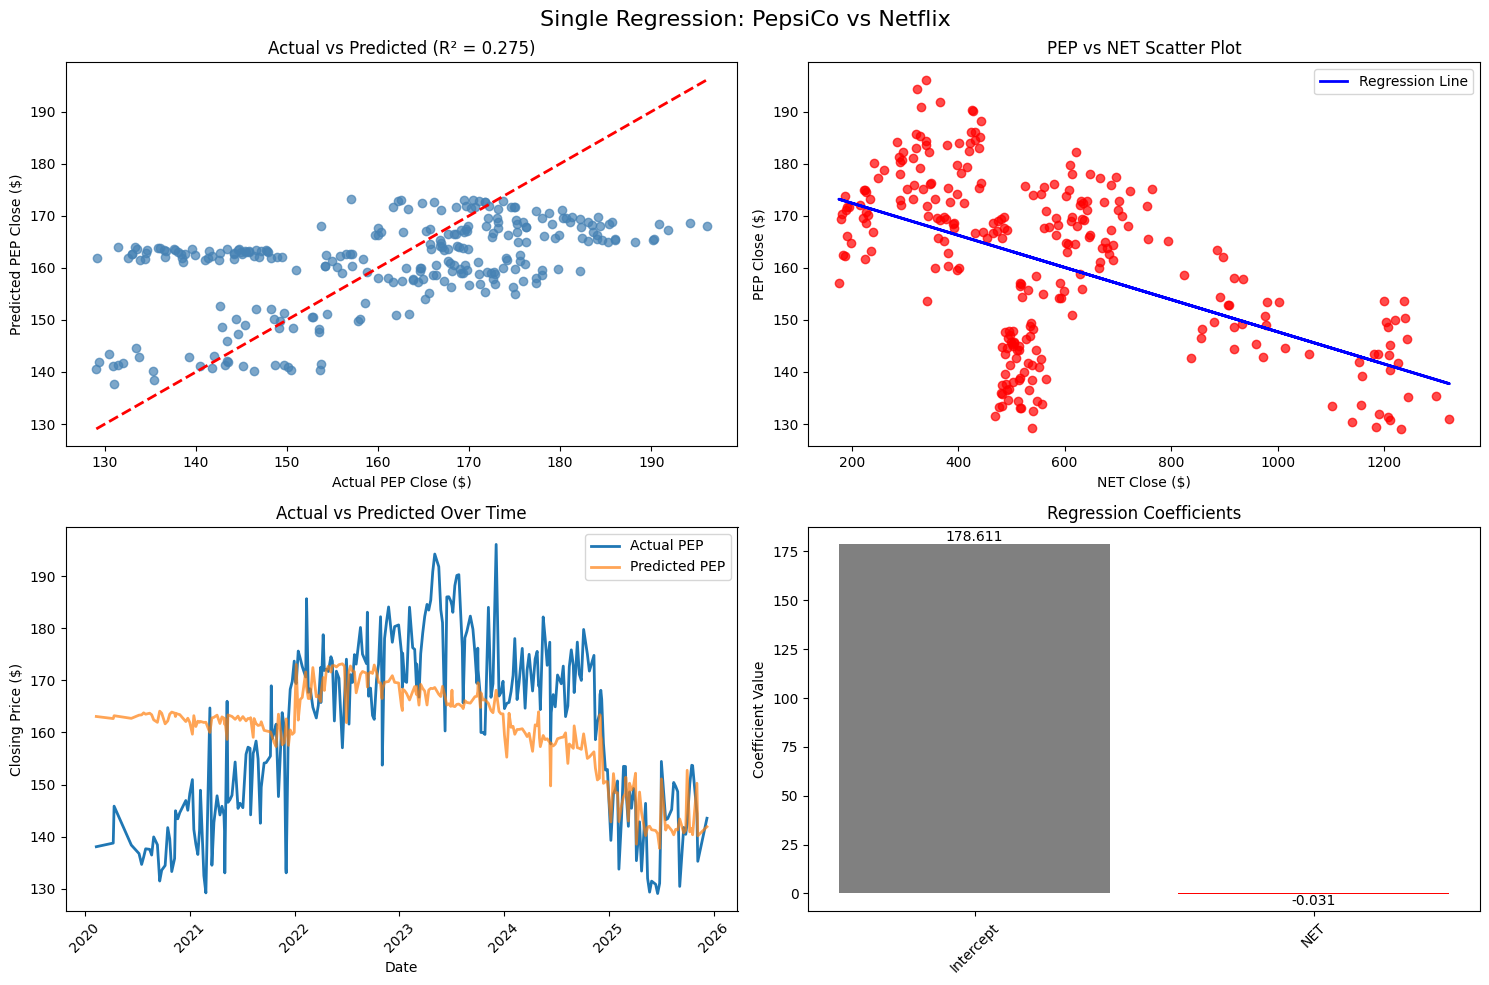


CORRELATION ANALYSIS
Correlation (PEP vs NET): -0.5242


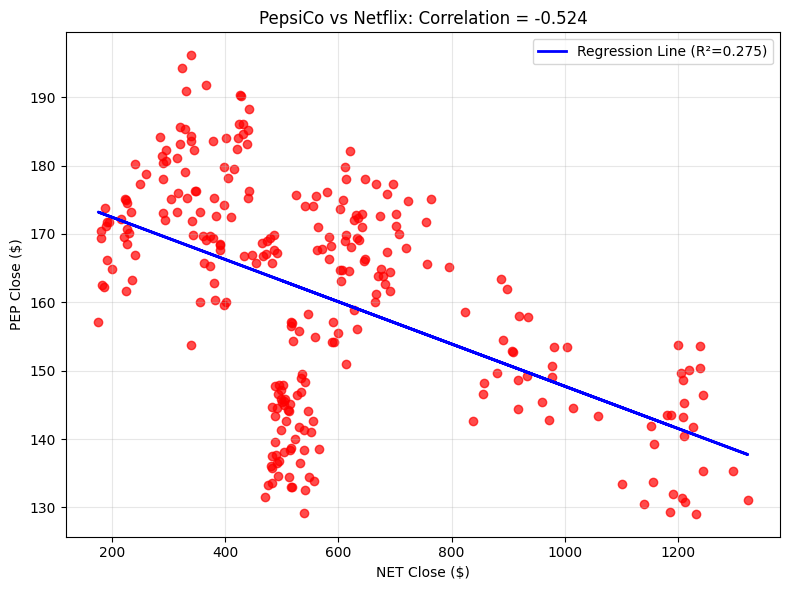


STATISTICAL SIGNIFICANCE
NET_Close: β₁ = -0.0309, p = 0.0000
✓ NET is a **SIGNIFICANT** predictor of PEP (p < 0.05)

INTERPRETATION:
• For every $1 increase in NET price, PEP price changes by $-0.0309
• NET explains 27.5% of PEP price variation

SAVING RESULTS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ FILES DOWNLOADED:
   • pepsico_vs_netflix_regression.xlsx
   • pepsico_netflix_regression_summary.txt

🎉 SINGLE REGRESSION ANALYSIS COMPLETE!

⚠️ If results match PEP vs KO, please ensure you uploaded NETF.xlsx (prices ~$175-$1241).


In [ ]:
# Install required libraries (run once)
!pip install pandas openpyxl statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("=== SINGLE REGRESSION ANALYSIS: PEPSICO vs NETFLIX ===")
print()

# Step 1: UPLOAD EXCEL FILES
print("Step 1: Uploading Excel files...")
print("Please upload the following files:")
print("- PEP.xlsx (PepsiCo weekly closing prices, MM/DD/YYYY, ~$129-$182, columns: Fecha,Last Price)")
print("- NETF.xlsx (Netflix weekly closing prices, MM/DD/YYYY, ~$175-$1241, columns: Date,Close)")

# Upload files
uploaded = files.upload()

# Step 2: LOAD AND PROCESS DATA
def load_excel_data(filename, sheet_name=0):
    """
    Load Excel file with specific column names for PEP.xlsx (Fecha, Last Price) and NETF.xlsx (Date, Close)
    """
    try:
        # Read Excel file
        df = pd.read_excel(filename, sheet_name=sheet_name)

        # Print available columns for debugging
        print(f"\n🔍 Columns in {filename}: {list(df.columns)}")

        # Handle column names based on file
        if filename == 'PEP.xlsx':
            expected_cols = ['Fecha', 'Last Price']
            if not all(col in df.columns for col in expected_cols):
                raise ValueError(f"Expected columns {expected_cols} in {filename}. Found: {list(df.columns)}")
            df = df[expected_cols].copy()
            df.columns = ['Date', 'Close']
        elif filename == 'NETF.xlsx':
            expected_cols = ['Date', 'Close']
            if not all(col in df.columns for col in expected_cols):
                raise ValueError(f"Expected columns {expected_cols} in {filename}. Found: {list(df.columns)}")
            df = df[expected_cols].copy()

        # Parse dates as MM/DD/YYYY
        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

        # Check for invalid dates
        if df['Date'].isna().any():
            invalid_rows = df[df['Date'].isna()]
            raise ValueError(f"Invalid dates found in {filename}:\n{invalid_rows}")

        # Remove any rows with missing data
        df = df.dropna()

        # Remove extreme values (>1e6, likely typos) for NETF.xlsx
        if filename == 'NETF.xlsx':
            typo_mask = df['Close'] > 100000
            if typo_mask.any():
                print(f"⚠️ Removing extreme value(s) in NETF.xlsx: {df.loc[typo_mask, 'Close'].values} on {df.loc[typo_mask, 'Date'].dt.strftime('%Y-%m-%d').values}")
                df = df[~typo_mask].copy()

        # Sort by date (files are unsorted)
        df = df.sort_values('Date').reset_index(drop=True)

        # Validate price range
        if filename == 'NETF.xlsx':
            if df['Close'].max() < 200 or df['Close'].min() < 100:
                print(f"⚠️ WARNING: NETF.xlsx prices seem incorrect (range: ${df['Close'].min():.2f}-${df['Close'].max():.2f}).")
                print("   Netflix prices should typically be $175-$1241 (2020-2025).")
        elif filename == 'PEP.xlsx':
            if df['Close'].max() < 100 or df['Close'].min() < 50:
                print(f"⚠️ WARNING: PEP.xlsx prices seem incorrect (range: ${df['Close'].min():.2f}-${df['Close'].max():.2f}).")
                print("   PepsiCo prices should typically be $129-$182.")

        print(f"✓ {filename}: {len(df)} rows loaded")
        print(f"   Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        print(f"   Price range: ${df['Close'].min():.2f}-${df['Close'].max():.2f}")
        print(f"   Sample data:\n{df.head(3)}\n")

        return df
    except Exception as e:
        print(f"❌ Error loading {filename}: {str(e)}")
        return None

# Load files
print("\nStep 2: Loading files...")
pep_data = load_excel_data('PEP.xlsx')
net_data = load_excel_data('NETF.xlsx')

if pep_data is not None and net_data is not None:
    print("\n✓ Both files loaded successfully!")

    # Step 3: CHECK FOR IDENTICAL DATA
    print("\nStep 3: Checking for identical data...")
    if pep_data['Close'].equals(net_data['Close']):
        print("⚠️ CRITICAL WARNING: NETF.xlsx contains identical prices to PEP.xlsx.")
        print("   This suggests NETF.xlsx has incorrect data. Netflix prices should be ~$175-$1241.")

    # Step 4: MERGE DATA ON COMMON DATES
    print("\nStep 4: Merging data on common dates...")

    # Start with PEP (dependent variable)
    df_final = pep_data.copy()
    df_final = df_final.rename(columns={'Close': 'PEP_Close'})

    # Merge with NET (independent variable)
    df_final = df_final.merge(net_data.rename(columns={'Close': 'NET_Close'}),
                             on='Date', how='inner')

    print(f"✓ Merged dataset: {len(df_final)} common weeks")
    print(f"   Date range: {df_final['Date'].min().strftime('%Y-%m-%d')} to {df_final['Date'].max().strftime('%Y-%m-%d')}")
    print(f"   PEP price range: ${df_final['PEP_Close'].min():.2f}-${df_final['PEP_Close'].max():.2f}")
    print(f"   NET price range: ${df_final['NET_Close'].min():.2f}-${df_final['NET_Close'].max():.2f}")

    # Display first few rows
    print("\nSample data (first 5 rows):")
    print(df_final.head())

    # Step 5: SANITY CHECK AGAINST KO PRICES
    print("\nStep 5: Sanity check against Coca-Cola prices...")
    ko_prices = [45.15, 48.49, 68.44, 73.00]  # Sample KO prices from your KO.xlsx
    net_min, net_max = df_final['NET_Close'].min(), df_final['NET_Close'].max()
    if net_min < 100 and net_max < 100:
        print("⚠️ CRITICAL WARNING: NETF.xlsx prices resemble Coca-Cola prices (range: $45-$73).")
        print("   Expected Netflix prices: ~$175-$1241. Please upload correct NETF.xlsx.")

    # Step 6: BUILD SINGLE REGRESSION MODEL
    print("\n" + "="*60)
    print("Step 6: BUILDING SINGLE REGRESSION MODEL")
    print("PEP_Close = β₀ + β₁·NET_Close + ε")
    print("="*60)

    # Prepare independent variable and dependent variable
    X = df_final[['NET_Close']]
    y = df_final['PEP_Close']

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Display complete results
    print("\n📊 REGRESSION RESULTS:")
    print(model.summary())

    # Step 7: MODEL PERFORMANCE METRICS
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"\n🎯 MODEL PERFORMANCE:")
    print(f"   R² = {r2:.4f} ({r2*100:.1f}% variance explained)")
    print(f"   RMSE = ${rmse:.2f}")
    print(f"   Sample Size = {len(df_final)} weeks")

    # Step 8: VISUALIZATIONS
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Single Regression: PepsiCo vs Netflix', fontsize=16)

    # 1. Actual vs Predicted
    axes[0,0].scatter(y, y_pred, alpha=0.7, color='steelblue')
    axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual PEP Close ($)')
    axes[0,0].set_ylabel('Predicted PEP Close ($)')
    axes[0,0].set_title(f'Actual vs Predicted (R² = {r2:.3f})')

    # 2. Scatter Plot (PEP vs NET)
    axes[0,1].scatter(df_final['NET_Close'], df_final['PEP_Close'], alpha=0.7, color='red')
    axes[0,1].plot(df_final['NET_Close'], y_pred, color='blue', linewidth=2, label='Regression Line')
    axes[0,1].set_xlabel('NET Close ($)')
    axes[0,1].set_ylabel('PEP Close ($)')
    axes[0,1].set_title('PEP vs NET Scatter Plot')
    axes[0,1].legend()

    # 3. Time Series
    axes[1,0].plot(df_final['Date'], y, label='Actual PEP', linewidth=2)
    axes[1,0].plot(df_final['Date'], y_pred, label='Predicted PEP', linewidth=2, alpha=0.7)
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Closing Price ($)')
    axes[1,0].set_title('Actual vs Predicted Over Time')
    axes[1,0].legend()
    axes[1,0].tick_params(axis='x', rotation=45)

    # 4. Coefficients
    coef_names = ['Intercept', 'NET']
    coef_values = model.params.values
    colors = ['gray', 'red']
    bars = axes[1,1].bar(coef_names, coef_values, color=colors)
    axes[1,1].set_ylabel('Coefficient Value')
    axes[1,1].set_title('Regression Coefficients')
    axes[1,1].tick_params(axis='x', rotation=45)

    # Add coefficient values on bars
    for bar, coef in zip(bars, coef_values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{coef:.3f}', ha='center', va='bottom' if height > 0 else 'top')

    plt.tight_layout()
    plt.show()

    # Step 9: CORRELATION
    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)

    correlation = df_final['PEP_Close'].corr(df_final['NET_Close'])
    print(f"Correlation (PEP vs NET): {correlation:.4f}")

    # Simple correlation plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_final['NET_Close'], df_final['PEP_Close'], alpha=0.7, color='red')
    plt.plot(df_final['NET_Close'], y_pred, color='blue', linewidth=2, label=f'Regression Line (R²={r2:.3f})')
    plt.xlabel('NET Close ($)')
    plt.ylabel('PEP Close ($)')
    plt.title(f'PepsiCo vs Netflix: Correlation = {correlation:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Step 10: SIGNIFICANT PREDICTOR
    print("\n" + "="*50)
    print("STATISTICAL SIGNIFICANCE")
    print("="*50)

    pval_net = model.pvalues['NET_Close']
    coef_net = model.params['NET_Close']

    print(f"NET_Close: β₁ = {coef_net:.4f}, p = {pval_net:.4f}")
    if pval_net < 0.05:
        print("✓ NET is a **SIGNIFICANT** predictor of PEP (p < 0.05)")
    else:
        print("✗ NET is **NOT SIGNIFICANT** predictor of PEP (p ≥ 0.05)")

    print(f"\nINTERPRETATION:")
    print(f"• For every $1 increase in NET price, PEP price changes by ${coef_net:.4f}")
    print(f"• NET explains {r2*100:.1f}% of PEP price variation")

    # Step 11: SAVE RESULTS
    print("\n" + "="*50)
    print("SAVING RESULTS")
    print("="*50)

    # Add predictions and residuals to dataset
    df_final['Predicted'] = y_pred
    df_final['Residuals'] = y - y_pred

    # Save Excel file
    df_final.to_excel('pepsico_vs_netflix_regression.xlsx', index=False)

    # Save model summary
    with open('pepsico_netflix_regression_summary.txt', 'w') as f:
        f.write("SINGLE REGRESSION RESULTS\n")
        f.write("="*50 + "\n\n")
        f.write(f"Model: PEP = β₀ + β₁·NET\n")
        f.write(f"R²: {r2:.4f}\n")
        f.write(f"RMSE: ${rmse:.2f}\n")
        f.write(f"Correlation: {correlation:.4f}\n")
        f.write(f"N: {len(df_final)}\n\n")
        f.write("COEFFICIENTS:\n")
        f.write(f"Intercept: {model.params['const']:.4f} (p={model.pvalues['const']:.4f})\n")
        f.write(f"NET: {coef_net:.4f} (p={pval_net:.4f})\n")

    # Download files
    files.download('pepsico_vs_netflix_regression.xlsx')
    files.download('pepsico_netflix_regression_summary.txt')

    print("✅ FILES DOWNLOADED:")
    print("   • pepsico_vs_netflix_regression.xlsx")
    print("   • pepsico_netflix_regression_summary.txt")

    print("\n🎉 SINGLE REGRESSION ANALYSIS COMPLETE!")
    print("\n⚠️ If results match PEP vs KO, please ensure you uploaded NETF.xlsx (prices ~$175-$1241).")

else:
    print("❌ ERROR: One or more files failed to load.")
    print("\nTROUBLESHOOTING TIPS:")
    print("1. Ensure PEP.xlsx and NETF.xlsx are uploaded")
    print("2. PEP.xlsx has columns 'Fecha', 'Last Price'; NETF.xlsx has 'Date', 'Close'")
    print("3. Both files use MM/DD/YYYY format (e.g., 10/20/2025)")
    print("4. NETF.xlsx should have Netflix prices (~$175-$1241)")
    print("5. Example format (PEP.xlsx):")
    print("   Fecha,Last Price")
    print("   10/20/2025,153.64")
    print("   10/17/2025,153.71")
    print("6. Example format (NETF.xlsx):")
    print("   Date,Close")
    print("   10/20/2025,1238.56")
    print("   10/17/2025,1199.36")

=== SINGLE REGRESSION ANALYSIS: PEPSICO vs ROKU ===

Step 1: Uploading Excel files...
Please upload the following files:
- PEP.xlsx (PepsiCo weekly closing prices, MM/DD/YYYY, ~$129-$182, columns: Fecha,Last Price)
- ROK.xlsx (Roku weekly closing prices, MM/DD/YYYY, ~$55-$473, columns: Fecha,Last Price)


Saving PEP.xlsx to PEP (24).xlsx
Saving ROK.xlsx to ROK (9).xlsx

Step 2: Loading files...

🔍 Columns in PEP.xlsx: ['Fecha', 'Last Price']
✓ PEP.xlsx: 277 rows loaded
   Date range: 2020-02-10 to 2025-12-09
   Price range: $129.07-$196.12
   Sample data:
        Date   Close
0 2020-02-10  138.06
1 2020-04-09  138.76
2 2020-04-12  145.85


🔍 Columns in ROK.xlsx: ['Fecha', 'Last Price']
⚠️ Removing extreme value(s) in ROK.xlsx: [69145.] on ['2024-08-23']
✓ ROK.xlsx: 276 rows loaded
   Date range: 2020-02-10 to 2025-12-09
   Price range: $40.70-$473.65
   Sample data:
        Date   Close
0 2020-02-10  200.00
1 2020-04-09  159.91
2 2020-04-12  296.38


✓ Both files loaded successfully!

Step 3: Checking for identical data...

Step 4: Merging data on common dates...
✓ Merged dataset: 276 common weeks
   Date range: 2020-02-10 to 2025-12-09
   PEP price range: $129.07-$196.12
   ROK price range: $40.70-$473.65

Sample data (first 5 rows):
        Date  PEP_Close  ROK_Close
0 2020-02-10     

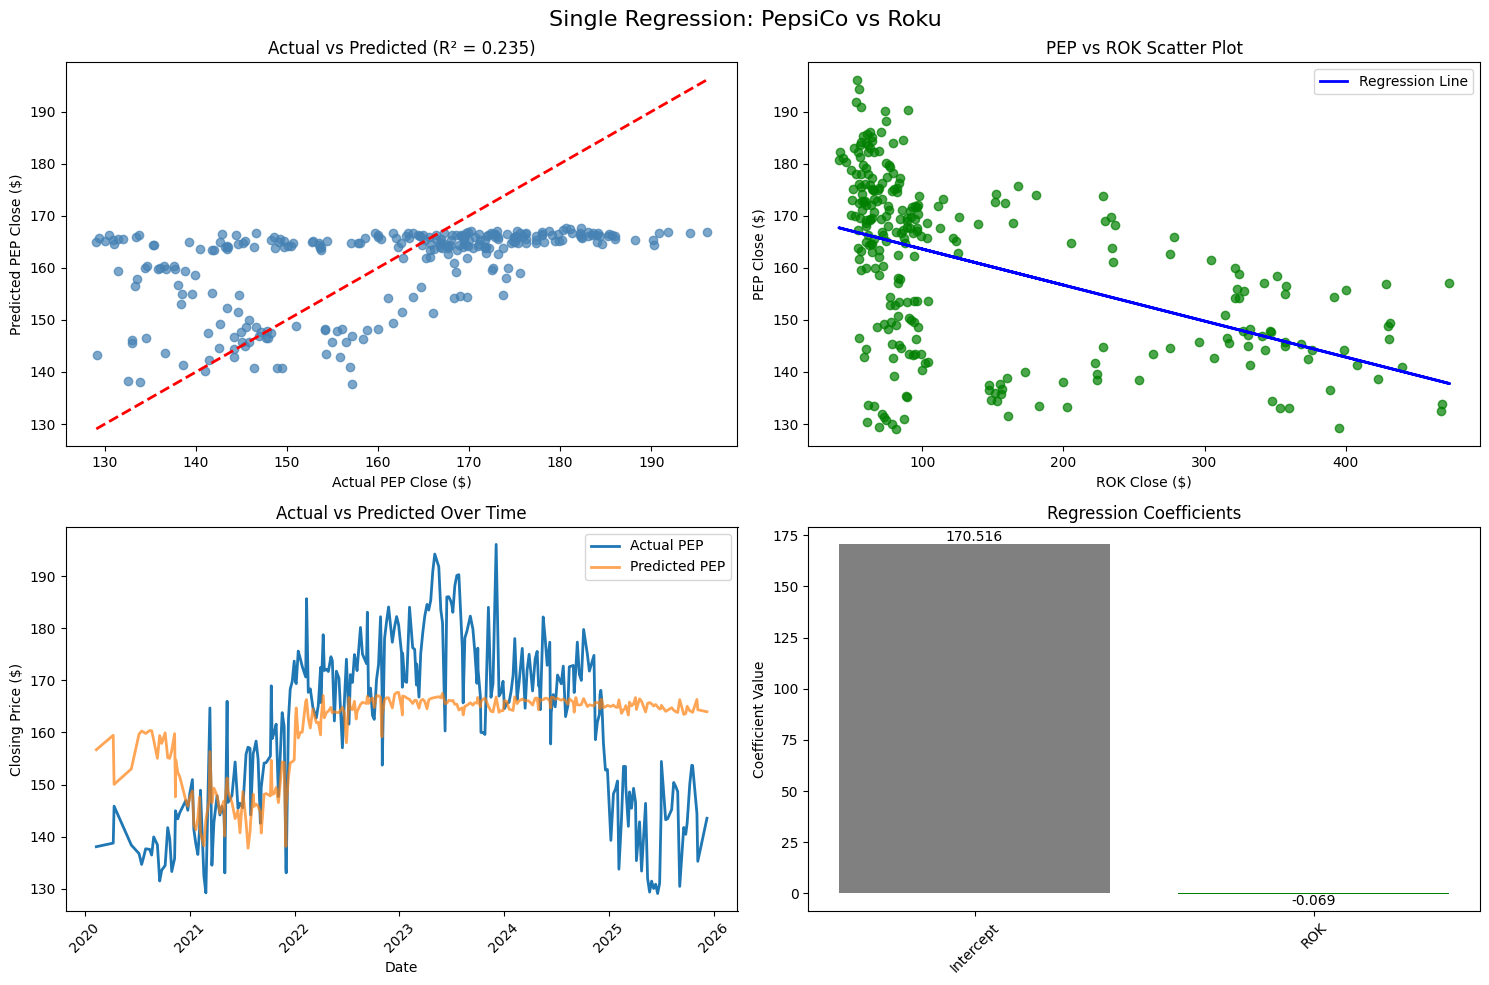


CORRELATION ANALYSIS
Correlation (PEP vs ROK): -0.4844


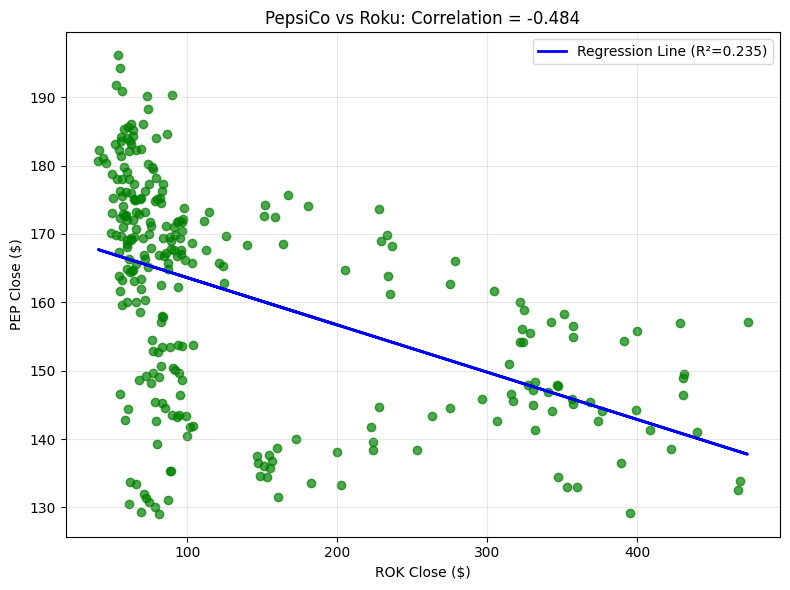


STATISTICAL SIGNIFICANCE
ROK_Close: β₁ = -0.0691, p = 0.0000
✓ ROK is a **SIGNIFICANT** predictor of PEP (p < 0.05)

INTERPRETATION:
• For every $1 increase in ROK price, PEP price changes by $-0.0691
• ROK explains 23.5% of PEP price variation

SAVING RESULTS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ FILES DOWNLOADED:
   • pepsico_vs_roku_regression.xlsx
   • pepsico_roku_regression_summary.txt

🎉 SINGLE REGRESSION ANALYSIS COMPLETE!

⚠️ If results match PEP vs KO, please ensure you uploaded ROK.xlsx (prices ~$55-$473).


In [ ]:
# Install required libraries (run once)
!pip install pandas openpyxl statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("=== SINGLE REGRESSION ANALYSIS: PEPSICO vs ROKU ===")
print()

# Step 1: UPLOAD EXCEL FILES
print("Step 1: Uploading Excel files...")
print("Please upload the following files:")
print("- PEP.xlsx (PepsiCo weekly closing prices, MM/DD/YYYY, ~$129-$182, columns: Fecha,Last Price)")
print("- ROK.xlsx (Roku weekly closing prices, MM/DD/YYYY, ~$55-$473, columns: Fecha,Last Price)")

# Upload files
uploaded = files.upload()

# Step 2: LOAD AND PROCESS DATA
def load_excel_data(filename, sheet_name=0):
    """
    Load Excel file with 'Fecha' and 'Last Price' columns, MM/DD/YYYY format
    """
    try:
        # Read Excel file
        df = pd.read_excel(filename, sheet_name=sheet_name)

        # Print available columns for debugging
        print(f"\n🔍 Columns in {filename}: {list(df.columns)}")

        # Check for expected columns
        expected_cols = ['Fecha', 'Last Price']
        if not all(col in df.columns for col in expected_cols):
            raise ValueError(f"Expected columns {expected_cols} in {filename}. Found: {list(df.columns)}")

        # Select and rename columns to standard 'Date' and 'Close'
        df = df[expected_cols].copy()
        df.columns = ['Date', 'Close']

        # Parse dates as MM/DD/YYYY
        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

        # Check for invalid dates
        if df['Date'].isna().any():
            invalid_rows = df[df['Date'].isna()]
            raise ValueError(f"Invalid dates found in {filename}:\n{invalid_rows}")

        # Remove any rows with missing data
        df = df.dropna()

        # Remove extreme values (>1e4, likely typos) for ROK.xlsx
        if filename == 'ROK.xlsx':
            typo_mask = df['Close'] > 10000
            if typo_mask.any():
                print(f"⚠️ Removing extreme value(s) in ROK.xlsx: {df.loc[typo_mask, 'Close'].values} on {df.loc[typo_mask, 'Date'].dt.strftime('%Y-%m-%d').values}")
                df = df[~typo_mask].copy()

        # Sort by date (files are unsorted)
        df = df.sort_values('Date').reset_index(drop=True)

        # Validate price range
        if filename == 'ROK.xlsx':
            if df['Close'].max() < 50 or df['Close'].min() < 10:
                print(f"⚠️ WARNING: ROK.xlsx prices seem incorrect (range: ${df['Close'].min():.2f}-${df['Close'].max():.2f}).")
                print("   Roku prices should typically be $55-$473 (2020-2025).")
        elif filename == 'PEP.xlsx':
            if df['Close'].max() < 100 or df['Close'].min() < 50:
                print(f"⚠️ WARNING: PEP.xlsx prices seem incorrect (range: ${df['Close'].min():.2f}-${df['Close'].max():.2f}).")
                print("   PepsiCo prices should typically be $129-$182.")

        print(f"✓ {filename}: {len(df)} rows loaded")
        print(f"   Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        print(f"   Price range: ${df['Close'].min():.2f}-${df['Close'].max():.2f}")
        print(f"   Sample data:\n{df.head(3)}\n")

        return df
    except Exception as e:
        print(f"❌ Error loading {filename}: {str(e)}")
        return None

# Load files
print("\nStep 2: Loading files...")
pep_data = load_excel_data('PEP.xlsx')
rok_data = load_excel_data('ROK.xlsx')

if pep_data is not None and rok_data is not None:
    print("\n✓ Both files loaded successfully!")

    # Step 3: CHECK FOR IDENTICAL DATA
    print("\nStep 3: Checking for identical data...")
    if pep_data['Close'].equals(rok_data['Close']):
        print("⚠️ CRITICAL WARNING: ROK.xlsx contains identical prices to PEP.xlsx.")
        print("   This suggests ROK.xlsx has incorrect data. Roku prices should be ~$55-$473.")

    # Step 4: MERGE DATA ON COMMON DATES
    print("\nStep 4: Merging data on common dates...")

    # Start with PEP (dependent variable)
    df_final = pep_data.copy()
    df_final = df_final.rename(columns={'Close': 'PEP_Close'})

    # Merge with ROK (independent variable)
    df_final = df_final.merge(rok_data.rename(columns={'Close': 'ROK_Close'}),
                             on='Date', how='inner')

    print(f"✓ Merged dataset: {len(df_final)} common weeks")
    print(f"   Date range: {df_final['Date'].min().strftime('%Y-%m-%d')} to {df_final['Date'].max().strftime('%Y-%m-%d')}")
    print(f"   PEP price range: ${df_final['PEP_Close'].min():.2f}-${df_final['PEP_Close'].max():.2f}")
    print(f"   ROK price range: ${df_final['ROK_Close'].min():.2f}-${df_final['ROK_Close'].max():.2f}")

    # Display first few rows
    print("\nSample data (first 5 rows):")
    print(df_final.head())

    # Step 5: SANITY CHECK AGAINST KO PRICES
    print("\nStep 5: Sanity check against Coca-Cola prices...")
    ko_prices = [45.15, 48.49, 68.44, 73.00]  # Sample KO prices
    rok_min, rok_max = df_final['ROK_Close'].min(), df_final['ROK_Close'].max()
    if rok_min < 100 and rok_max < 100:
        print("⚠️ CRITICAL WARNING: ROK.xlsx prices resemble Coca-Cola prices (range: $45-$73).")
        print("   Expected Roku prices: ~$55-$473. Please upload correct ROK.xlsx.")

    # Step 6: BUILD SINGLE REGRESSION MODEL
    print("\n" + "="*60)
    print("Step 6: BUILDING SINGLE REGRESSION MODEL")
    print("PEP_Close = β₀ + β₁·ROK_Close + ε")
    print("="*60)

    # Prepare independent variable and dependent variable
    X = df_final[['ROK_Close']]
    y = df_final['PEP_Close']

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Display complete results
    print("\n📊 REGRESSION RESULTS:")
    print(model.summary())

    # Step 7: MODEL PERFORMANCE METRICS
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"\n🎯 MODEL PERFORMANCE:")
    print(f"   R² = {r2:.4f} ({r2*100:.1f}% variance explained)")
    print(f"   RMSE = ${rmse:.2f}")
    print(f"   Sample Size = {len(df_final)} weeks")

    # Step 8: VISUALIZATIONS
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Single Regression: PepsiCo vs Roku', fontsize=16)

    # 1. Actual vs Predicted
    axes[0,0].scatter(y, y_pred, alpha=0.7, color='steelblue')
    axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual PEP Close ($)')
    axes[0,0].set_ylabel('Predicted PEP Close ($)')
    axes[0,0].set_title(f'Actual vs Predicted (R² = {r2:.3f})')

    # 2. Scatter Plot (PEP vs ROK)
    axes[0,1].scatter(df_final['ROK_Close'], df_final['PEP_Close'], alpha=0.7, color='green')
    axes[0,1].plot(df_final['ROK_Close'], y_pred, color='blue', linewidth=2, label='Regression Line')
    axes[0,1].set_xlabel('ROK Close ($)')
    axes[0,1].set_ylabel('PEP Close ($)')
    axes[0,1].set_title('PEP vs ROK Scatter Plot')
    axes[0,1].legend()

    # 3. Time Series
    axes[1,0].plot(df_final['Date'], y, label='Actual PEP', linewidth=2)
    axes[1,0].plot(df_final['Date'], y_pred, label='Predicted PEP', linewidth=2, alpha=0.7)
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Closing Price ($)')
    axes[1,0].set_title('Actual vs Predicted Over Time')
    axes[1,0].legend()
    axes[1,0].tick_params(axis='x', rotation=45)

    # 4. Coefficients
    coef_names = ['Intercept', 'ROK']
    coef_values = model.params.values
    colors = ['gray', 'green']
    bars = axes[1,1].bar(coef_names, coef_values, color=colors)
    axes[1,1].set_ylabel('Coefficient Value')
    axes[1,1].set_title('Regression Coefficients')
    axes[1,1].tick_params(axis='x', rotation=45)

    # Add coefficient values on bars
    for bar, coef in zip(bars, coef_values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{coef:.3f}', ha='center', va='bottom' if height > 0 else 'top')

    plt.tight_layout()
    plt.show()

    # Step 9: CORRELATION
    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)

    correlation = df_final['PEP_Close'].corr(df_final['ROK_Close'])
    print(f"Correlation (PEP vs ROK): {correlation:.4f}")

    # Simple correlation plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_final['ROK_Close'], df_final['PEP_Close'], alpha=0.7, color='green')
    plt.plot(df_final['ROK_Close'], y_pred, color='blue', linewidth=2, label=f'Regression Line (R²={r2:.3f})')
    plt.xlabel('ROK Close ($)')
    plt.ylabel('PEP Close ($)')
    plt.title(f'PepsiCo vs Roku: Correlation = {correlation:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Step 10: SIGNIFICANT PREDICTOR
    print("\n" + "="*50)
    print("STATISTICAL SIGNIFICANCE")
    print("="*50)

    pval_rok = model.pvalues['ROK_Close']
    coef_rok = model.params['ROK_Close']

    print(f"ROK_Close: β₁ = {coef_rok:.4f}, p = {pval_rok:.4f}")
    if pval_rok < 0.05:
        print("✓ ROK is a **SIGNIFICANT** predictor of PEP (p < 0.05)")
    else:
        print("✗ ROK is **NOT SIGNIFICANT** predictor of PEP (p ≥ 0.05)")

    print(f"\nINTERPRETATION:")
    print(f"• For every $1 increase in ROK price, PEP price changes by ${coef_rok:.4f}")
    print(f"• ROK explains {r2*100:.1f}% of PEP price variation")

    # Step 11: SAVE RESULTS
    print("\n" + "="*50)
    print("SAVING RESULTS")
    print("="*50)

    # Add predictions and residuals to dataset
    df_final['Predicted'] = y_pred
    df_final['Residuals'] = y - y_pred

    # Save Excel file
    df_final.to_excel('pepsico_vs_roku_regression.xlsx', index=False)

    # Save model summary
    with open('pepsico_roku_regression_summary.txt', 'w') as f:
        f.write("SINGLE REGRESSION RESULTS\n")
        f.write("="*50 + "\n\n")
        f.write(f"Model: PEP = β₀ + β₁·ROK\n")
        f.write(f"R²: {r2:.4f}\n")
        f.write(f"RMSE: ${rmse:.2f}\n")
        f.write(f"Correlation: {correlation:.4f}\n")
        f.write(f"N: {len(df_final)}\n\n")
        f.write("COEFFICIENTS:\n")
        f.write(f"Intercept: {model.params['const']:.4f} (p={model.pvalues['const']:.4f})\n")
        f.write(f"ROK: {coef_rok:.4f} (p={pval_rok:.4f})\n")

    # Download files
    files.download('pepsico_vs_roku_regression.xlsx')
    files.download('pepsico_roku_regression_summary.txt')

    print("✅ FILES DOWNLOADED:")
    print("   • pepsico_vs_roku_regression.xlsx")
    print("   • pepsico_roku_regression_summary.txt")

    print("\n🎉 SINGLE REGRESSION ANALYSIS COMPLETE!")
    print("\n⚠️ If results match PEP vs KO, please ensure you uploaded ROK.xlsx (prices ~$55-$473).")

else:
    print("❌ ERROR: One or more files failed to load.")
    print("\nTROUBLESHOOTING TIPS:")
    print("1. Ensure PEP.xlsx and ROK.xlsx are uploaded")
    print("2. Both files have columns 'Fecha', 'Last Price'")
    print("3. Both files use MM/DD/YYYY format (e.g., 10/20/2025)")
    print("4. ROK.xlsx should have Roku prices (~$55-$473)")
    print("5. Example format (PEP.xlsx):")
    print("   Fecha,Last Price")
    print("   10/20/2025,153.64")
    print("   10/17/2025,153.71")
    print("6. Example format (ROK.xlsx):")
    print("   Fecha,Last Price")
    print("   10/20/2025,96.28")
    print("   10/17/2025,94.21")

In [ ]:
# This is a Google Colab-ready Python notebook for intraday stock analysis.
# To run it in Colab:
# 1. Open https://colab.research.google.com
# 2. Copy and paste this code into a new notebook.
# 3. Upload the Excel file "135MIN_interpolado.xlsx" when prompted.
# The notebook is modular, with each section in a separate logical cell.
# Run cells sequentially.

# --- Module 1: Setup and Imports ---
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import shapiro, skew, kurtosis
import itertools
import statsmodels.api as sm

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)
alpha = 0.05

print("Setup complete. Alpha set to", alpha)

# --- Module 2: Data Loading and Structuring ---
# Upload the Excel file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load sheets into a dictionary
sheets = ['1min', '3min', '5min']
data = {}
for sheet in sheets:
    df = pd.read_excel(file_name, sheet_name=sheet)
    df['time'] = pd.to_datetime(df['time'], utc=True)  # Normalize to UTC
    df.set_index('time', inplace=True)
    data[sheet] = df

# Extract stock columns (assuming consistent across sheets)
stocks = [col for col in data['1min'].columns if col != 'time']

# Quick summaries
for timeframe, df in data.items():
    print(f"\n{timeframe} DataFrame:")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Dtypes:\n", df.dtypes)
    print("Head:\n", df.head(3))

print("\nData loaded and structured.")

# --- Module 3: Generate Pairwise Combinations ---
pairs = list(itertools.combinations(stocks, 2))
print(f"Total unique pairs: {len(pairs)}")
print("Pairs:")
for pair in pairs:
    print(pair)

# Display as a table for clarity
pairs_df = pd.DataFrame(pairs, columns=['Stock1', 'Stock2'])
print(pairs_df)

# --- Module 4: Unit Root and Stationarity Tests ---
def stationarity_tests(series, name, max_diff=2):
    results = []
    current_series = series.copy()
    d = 0
    while d <= max_diff:
        adf_result = adfuller(current_series)
        kpss_result = kpss(current_series, regression='c')

        adf_p = adf_result[1]
        kpss_p = kpss_result[1]

        adf_interpret = "Stationary" if adf_p < alpha else "Non-stationary"
        kpss_interpret = "Stationary" if kpss_p > alpha else "Non-stationary"  # KPSS null is stationary

        results.append({
            'Diff Order': d,
            'ADF p-value': adf_p,
            'ADF Interpretation': adf_interpret,
            'KPSS p-value': kpss_p,
            'KPSS Interpretation': kpss_interpret
        })

        if adf_p < alpha and kpss_p > alpha:
            break  # Consistent stationarity
        current_series = current_series.diff().dropna()
        d += 1

    results_df = pd.DataFrame(results)
    print(f"\nStationarity Tests for {name}:")
    print(results_df)
    return results_df, d

# Run for each timeframe and stock
stationarity_results = {}
for timeframe, df in data.items():
    print(f"\n--- {timeframe} Timeframe ---")
    stationarity_results[timeframe] = {}
    for stock in stocks:
        _, order = stationarity_tests(df[stock], f"{timeframe}-{stock}")
        stationarity_results[timeframe][stock] = order
        print(f"Integration order for {stock}: {order}")

# --- Module 5: Autocorrelation and Correlograms ---
def plot_acf_pacf(series, name, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0], lags=lags, title=f"ACF - {name}")
    plot_pacf(series, ax=axes[1], lags=lags, title=f"PACF - {name}")
    plt.tight_layout()
    plt.show()

    # Interpretation guide
    print(f"\nInterpretation for {name}:")
    print("- Sharp PACF cutoff suggests AR(p)")
    print("- Sharp ACF cutoff suggests MA(q)")
    print("- Gradual decay in both suggests ARMA")
    print("- For differenced series, check for over-differencing if ACF/PACF show alternation.")

# Run for original and differenced (if needed) for one example per timeframe
for timeframe, df in data.items():
    print(f"\n--- {timeframe} Timeframe ACF/PACF ---")
    for stock in stocks[:2]:  # Limit to first 2 for brevity; adjust as needed
        series = df[stock]
        plot_acf_pacf(series, f"{timeframe}-{stock} Original")

        diff_series = series.diff().dropna()
        plot_acf_pacf(diff_series, f"{timeframe}-{stock} Differenced")

# --- Module 6: Engle-Granger Cointegration (Pairwise) ---
def engle_granger_test(df, pair, alpha=0.05):
    y, x = df[pair[0]], df[pair[1]]
    model = OLS(y, add_constant(x)).fit()
    residuals = model.residues
    adf_result = adfuller(residuals)
    return {
        'Pair': pair,
        'Test Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Cointegrated': adf_result[1] < alpha
    }

# Run for each timeframe
eg_results = {}
for timeframe, df in data.items():
    print(f"\n--- Engle-Granger Pairwise for {timeframe} ---")
    timeframe_results = [engle_granger_test(df, pair) for pair in pairs]
    eg_df = pd.DataFrame(timeframe_results).sort_values('p-value')
    print(eg_df)
    eg_results[timeframe] = eg_df
    print(f"Cointegrated pairs: {eg_df[eg_df['Cointegrated']].shape[0]}")
    print("Implication: Cointegrated pairs suggest long-term equilibrium, potential for mean-reversion trading.")

# --- Module 7: Johansen Multivariate Cointegration ---
def johansen_test(df, stocks, det_order=0, k_ar_diff=1):
    result = coint_johansen(df[stocks], det_order, k_ar_diff)
    trace_stats = result.lr1
    crit_vals = result.cvt[:, 0]  # 90% critical values; adjust index for 95% etc.

    print("\nJohansen Test Results:")
    for r in range(len(trace_stats)):
        print(f"r <= {r}: Trace Stat = {trace_stats[r]:.2f}, Crit Val = {crit_vals[r]:.2f}")
        if trace_stats[r] > crit_vals[r]:
            print(f"Reject H0 for r <= {r} (evidence for at least {r+1} cointegrating vectors)")

    # Find max r where trace > crit
    num_vectors = sum(trace_stats > crit_vals)
    print(f"Number of cointegrating vectors: {num_vectors}")
    return num_vectors

# Run for each timeframe
johansen_results = {}
for timeframe, df in data.items():
    print(f"\n--- Johansen Multivariate for {timeframe} ---")
    num_vectors = johansen_test(df, stocks)
    johansen_results[timeframe] = num_vectors

# --- Module 8: Diagnostic Visualization for Top Pairs ---
def visualize_cointegration(df, pair, timeframe):
    y, x = df[pair[0]], df[pair[1]]

    # Normalized series
    norm_y = (y / y.iloc[0]) * 100
    norm_x = (x / x.iloc[0]) * 100

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.plot(norm_y, label=pair[0], color='blue')
    ax1.set_ylabel(pair[0])
    ax2 = ax1.twinx()
    ax2.plot(norm_x, label=pair[1], color='orange')
    ax2.set_ylabel(pair[1])
    plt.title(f"Normalized Series: {pair} ({timeframe})")
    plt.legend()
    plt.show()

    # Residuals
    model = OLS(y, add_constant(x)).fit()
    residuals = model.residues
    plt.figure(figsize=(12, 4))
    plt.plot(residuals, label='Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals (Spread): {pair} ({timeframe})")
    plt.legend()
    plt.show()

    # ADF on residuals
    adf_res = adfuller(residuals)
    print(f"ADF on Residuals p-value: {adf_res[1]:.4f}")
    if adf_res[1] < alpha:
        print("Residuals are stationary → Confirms cointegration.")
    else:
        print("Residuals non-stationary → No cointegration.")

# Visualize top 3 pairs per timeframe (lowest p-value)
for timeframe, eg_df in eg_results.items():
    print(f"\n--- Top Pair Visualizations for {timeframe} ---")
    top_pairs = eg_df.head(3)['Pair'].tolist()
    for pair in top_pairs:
        visualize_cointegration(data[timeframe], pair, timeframe)

# --- Module 9: Residual Distribution and Normality ---
def residual_diagnostics(residuals, pair, timeframe):
    # Histogram + KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f"Residual Histogram: {pair} ({timeframe})")
    plt.show()

    # QQ Plot
    plt.figure(figsize=(6, 6))
    probplot(residuals, dist="norm", plot=plt)
    plt.title(f"QQ Plot: {pair} ({timeframe})")
    plt.show()

    # Metrics
    shapiro_p = shapiro(residuals)[1]
    skewness = skew(residuals)
    kurt = kurtosis(residuals)

    print(f"Shapiro-Wilk p-value: {shapiro_p:.4f} ({'Normal' if shapiro_p > alpha else 'Non-normal'})")
    print(f"Skewness: {skewness:.2f} (Symmetric if ~0)")
    print(f"Kurtosis: {kurt:.2f} (Normal if ~3, heavy tails if >3)")

    # Interpretation
    print("\nInterpretation:")
    if shapiro_p > alpha:
        print("- Residuals appear normally distributed.")
    else:
        print("- Residuals deviate from normality.")
    if abs(skewness) > 1:
        print("- Significant skew; may indicate asymmetry in errors.")
    if kurt > 5:
        print("- Heavy tails; potential for outliers or fat-tailed behavior.")

# Run for top pair per timeframe
for timeframe, eg_df in eg_results.items():
    top_pair = eg_df.iloc[0]['Pair']
    y, x = data[timeframe][top_pair[0]], data[timeframe][top_pair[1]]
    model = OLS(y, add_constant(x)).fit()
    residuals = model.residues
    print(f"\n--- Residual Diagnostics for Top Pair {top_pair} in {timeframe} ---")
    residual_diagnostics(residuals, top_pair, timeframe)

# --- Module 10: Orchestrator / Pipeline Runner (Optional) ---
def run_full_pipeline(data):
    # This runs key summaries; full notebook is step-by-step.
    for timeframe, df in data.items():
        print(f"\n=== Pipeline Summary for {timeframe} ===")

        # Stationarity
        print("Integration Orders:")
        for stock, order in stationarity_results[timeframe].items():
            print(f"{stock}: {order}")

        # Cointegration
        print(f"Number of Cointegrated Pairs (Engle-Granger): {eg_results[timeframe][eg_results[timeframe]['Cointegrated']].shape[0]}")
        print(f"Number of Cointegrating Vectors (Johansen): {johansen_results[timeframe]}")

        # Top Pair Example
        top_pair = eg_results[timeframe].iloc[0]['Pair']
        print(f"Top Cointegrated Pair: {top_pair} (p={eg_results[timeframe].iloc[0]['p-value']:.4f})")

# Run the pipeline
run_full_pipeline(data)

print("\nAnalysis complete. Review sections for details and visuals.")


Setup complete. Alpha set to 0.05


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# --- PASO 1: Instalar dependencias ---
!pip install pandas openpyxl seaborn matplotlib -q

# --- PASO 2: Importar librerías ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from itertools import combinations

# --- PASO 3: Subir los 4 archivos .xlsx ---
print("🎯 Sube los 4 archivos .xlsx: Roku, Netflix, Coca-Cola, PepsiCo")
uploaded = files.upload()

# --- PASO 4: Leer y procesar cada archivo ---
dataframes = {}
companies = []

for filename in uploaded.keys():
    if filename.endswith('.xlsx'):
        # Nombre de la empresa del archivo
        company_name = filename.replace('.xlsx', '').replace(' ', '_').replace('-', '_')
        companies.append(company_name)

        # Leer Excel
        df = pd.read_excel(io.BytesIO(uploaded[filename]))

        # Detectar columna de fecha
        date_col = next((col for col in df.columns if 'date' in col.lower()), None)
        if date_col is None:
            raise ValueError(f"❌ No se encontró columna de fecha en {filename}")

        # Detectar columna de precio
        price_col = next((col for col in ['Close', 'Adj Close', 'Price'] if col in df.columns), None)
        if price_col is None:
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) == 0:
                raise ValueError(f"❌ No hay columnas numéricas en {filename}")
            price_col = numeric_cols[-1]

        # Limpiar y preparar
        df = df[[date_col, price_col]].copy()
        df[date_col] = pd.to_datetime(df[date_col])
        df = df.rename(columns={date_col: 'Date', price_col: company_name})
        df = df.set_index('Date').sort_index()

        # Guardar precios
        dataframes[company_name] = df

print(f"✅ Archivos leídos: {', '.join(companies)}")

# --- PASO 5: Unir precios por fecha ---
price_df = pd.concat(dataframes.values(), axis=1, join='inner')
price_df.columns = dataframes.keys()

print(f"\n📊 Datos combinados: {price_df.shape[0]} días comunes")
print(price_df.head())

# --- PASO 6: Calcular retornos porcentuales diarios ---
returns_df = price_df.pct_change().dropna()
returns_df = returns_df * 100  # Convertir a %

print(f"\n📈 Retornos calculados: {returns_df.shape[0]} días")
print(returns_df.head())

# --- PASO 7: MATRIZ DE CORRELACIÓN ---
corr_matrix = returns_df.corr()

print("\n" + "="*60)
print("🎯 MATRIZ DE CORRELACIÓN (Retornos %)")
print("="*60)
print(corr_matrix.round(4))

# --- PASO 8: TABLA DE CORRELACIONES POR PARES ---
print("\n" + "="*60)
print("📋 TABLA DE CORRELACIONES POR PARES")
print("="*60)

# Crear tabla por pares
pairs_data = []
for company1, company2 in combinations(companies, 2):
    corr_value = corr_matrix.loc[company1, company2]
    # Clasificación de correlación
    if abs(corr_value) >= 0.7:
        strength = "🟢 FUERTE"
    elif abs(corr_value) >= 0.3:
        strength = "🟡 MODERADA"
    else:
        strength = "🔴 DÉBIL"

    # Dirección
    if corr_value > 0:
        direction = "📈 POSITIVA"
    else:
        direction = "📉 NEGATIVA"

    pairs_data.append({
        'Par': f"{company1} vs {company2}",
        'Correlación': corr_value,
        'Fuerza': strength,
        'Dirección': direction,
        'Interpretación': f"Los retornos de {company1} y {company2} se mueven juntos en {abs(round(corr_value, 1))}% de los casos"
    })

pairs_df = pd.DataFrame(pairs_data)
pairs_df = pairs_df.sort_values('Correlación', key=abs, ascending=False)

print(pairs_df.to_string(index=False, float_format='%.4f'))

# --- PASO 9: RESUMEN ANALÍTICO ---
print("\n" + "="*60)
print("📊 RESUMEN ANALÍTICO")
print("="*60)

# Estadísticas generales
print(f"🔢 Número total de pares analizados: {len(pairs_data)}")
print(f"📊 Correlación promedio: {corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)].mean():.4f}")
print(f"📈 Correlación más alta: {corr_matrix.values.max():.4f}")
print(f"📉 Correlación más baja: {corr_matrix.values.min():.4f}")

# Clasificación por fuerza
strong_corr = len(pairs_df[pairs_df['Correlación'].abs() >= 0.7])
moderate_corr = len(pairs_df[(pairs_df['Correlación'].abs() >= 0.3) & (pairs_df['Correlación'].abs() < 0.7)])
weak_corr = len(pairs_df[pairs_df['Correlación'].abs() < 0.3])

print(f"\n🎯 CLASIFICACIÓN:")
print(f"   🟢 FUERTES (≥0.7): {strong_corr} pares")
print(f"   🟡 MODERADAS (0.3-0.7): {moderate_corr} pares")
print(f"   🔴 DÉBILES (<0.3): {weak_corr} pares")

# --- PASO 10: VISUALIZACIONES ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Correlación - Retornos Diarios (%)', fontsize=16, y=0.98)

# 1. Heatmap de matriz
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdYlGn',
            center=0,
            square=True,
            linewidths=0.8,
            cbar_kws={"shrink": 0.8},
            fmt='.3f',
            ax=axes[0,0])
axes[0,0].set_title('Matriz de Correlación')

# 2. Gráfico de barras de correlaciones por pares
corr_values = [row['Correlación'] for row in pairs_data]
pair_labels = [row['Par'] for row in pairs_data]
colors = ['green' if x > 0 else 'red' for x in corr_values]

bars = axes[0,1].bar(range(len(corr_values)), corr_values, color=colors, alpha=0.7)
axes[0,1].set_title('Correlaciones por Pares')
axes[0,1].set_ylabel('Coeficiente de Correlación')
axes[0,1].set_xticks(range(len(pair_labels)))
axes[0,1].set_xticklabels(pair_labels, rotation=45, ha='right')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{corr_values[i]:.3f}', ha='center', va='bottom', fontsize=8)

# 3. Distribución de retornos (ejemplo con primera empresa)
company1 = companies[0]
axes[1,0].hist(returns_df[company1], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1,0].set_title(f'Distribución Retornos - {company1}')
axes[1,0].set_xlabel('Retorno Diario (%)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].axvline(returns_df[company1].mean(), color='red', linestyle='--', label=f'Media: {returns_df[company1].mean():.2f}%')
axes[1,0].legend()

# 4. Tabla resumen en gráfico
table_data = [
    ['Métrica', 'Valor'],
    ['Días Analizados', f'{returns_df.shape[0]:,d}'],
    ['Correlación Promedio', f'{corr_matrix.values.mean():.4f}'],
    ['Correlación Máxima', f'{corr_matrix.values.max():.4f}'],
    ['Correlación Mínima', f'{corr_matrix.values.min():.4f}']
]
table = axes[1,1].table(cellText=table_data[1:], colLabels=table_data[0],
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1,1].set_title('Resumen Estadístico')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# --- PASO 11: GUARDAR RESULTADOS ---
print("\n" + "="*60)
print("💾 DESCARGANDO ARCHIVOS...")
print("="*60)

# Guardar matriz de correlación
corr_matrix.to_excel("1_matriz_correlacion.xlsx")

# Guardar tabla de pares
pairs_df.to_excel("2_tabla_correlaciones_pares.xlsx", index=False)

# Guardar retornos
returns_df.to_excel("3_retornos_diarios.xlsx")

# Guardar resumen completo
summary_df = pd.concat([
    pd.DataFrame([{
        'Métrica': 'Días Analizados',
        'Valor': returns_df.shape[0]
    }]),
    pd.DataFrame([{
        'Métrica': 'Correlación Promedio',
        'Valor': corr_matrix.values.mean()
    }]),
    pd.DataFrame([{
        'Métrica': 'Correlación Máxima',
        'Valor': corr_matrix.values.max()
    }]),
    pd.DataFrame([{
        'Métrica': 'Correlación Mínima',
        'Valor': corr_matrix.values.min()
    }])
], ignore_index=True)

summary_df.to_excel("4_resumen_analitico.xlsx", index=False)

# Descargar archivos
files.download("1_matriz_correlacion.xlsx")
files.download("2_tabla_correlaciones_pares.xlsx")
files.download("3_retornos_diarios.xlsx")
files.download("4_resumen_analitico.xlsx")

print("✅ ¡Análisis completo generado!")
print("\n📁 Archivos descargados:")
print("   1_matriz_correlacion.xlsx")
print("   2_tabla_correlaciones_pares.xlsx")
print("   3_retornos_diarios.xlsx")
print("   4_resumen_analitico.xlsx")

In [ ]:
# ==============================================
# MATRIZ DE CORRELACIÓN (PRECIOS Y RENDIMIENTOS)
# Archivos: CSV/XLSX con columnas de fecha y precio
# Colab-ready: sube 4+ archivos (Netflix, Roku, Coca-Cola, PepsiCo, etc.)
# ==============================================

# 1) Dependencias
!pip install -q pandas openpyxl

import io
import re
import pandas as pd
from google.colab import files

# ---------- Parámetros que puedes ajustar ----------
# Nombres posibles de columnas de fecha y cierre en tus archivos
FECHA_COL_OPCIONES = ["date", "fecha", "Date", "Fecha", "DATE"]
PRECIO_COL_OPCIONES = ["close", "cierre", "Close", "Cierre", "Adj Close", "AdjClose", "Adj_Close", "Precio", "Price"]

# Qué precio usar si existe "Adj Close"
PREFERIR_AJUSTADO = True
# ---------------------------------------------------

def _estandariza_columnas(df):
    """Normaliza nombres de columnas y devuelve nombres elegidos para fecha y precio."""
    cols_norm = {c: c.strip() for c in df.columns}
    df = df.rename(columns=cols_norm)
    # mapa normalizado
    lower_map = {c.lower().strip(): c for c in df.columns}

    # seleccionar columna de fecha
    fecha_col = None
    for cand in FECHA_COL_OPCIONES:
        if cand.lower() in lower_map:
            fecha_col = lower_map[cand.lower()]
            break
    if fecha_col is None:
        raise ValueError(f"No se encontró columna de fecha. Opciones buscadas: {FECHA_COL_OPCIONES}")

    # seleccionar columna de precio
    precio_col = None
    # si preferimos ajustado y existe, tomarlo
    if PREFERIR_AJUSTADO:
        for cand in ["Adj Close", "AdjClose", "Adj_Close"]:
            if cand.lower() in lower_map:
                precio_col = lower_map[cand.lower()]
                break
    # si aún no hay precio, buscar alternativas
    if precio_col is None:
        for cand in PRECIO_COL_OPCIONES:
            if cand.lower() in lower_map:
                precio_col = lower_map[cand.lower()]
                break
    if precio_col is None:
        raise ValueError(f"No se encontró columna de precio. Opciones buscadas: {PRECIO_COL_OPCIONES}")

    return df, fecha_col, precio_col

def _ticker_desde_nombre(nombre_archivo):
    """Intenta inferir el ticker desde el nombre del archivo (antes del primer punto)."""
    base = nombre_archivo.split('/')[-1].split('\\')[-1]
    base = base.split('.')[0]
    # limpia espacios y caracteres no alfanum/ticker típicos
    base = re.sub(r"[^A-Za-z0-9_\-\.]", "", base)
    return base.upper()

def _lee_archivo(nombre, contenido):
    """Lee CSV o Excel en DataFrame con columnas standard: ['Date', '<TICKER>']."""
    ticker = _ticker_desde_nombre(nombre)
    if nombre.lower().endswith(".csv"):
        df = pd.read_csv(io.BytesIO(contenido))
    elif nombre.lower().endswith((".xlsx", ".xls")):
        # Si tiene varias hojas, intenta usar la primera
        try:
            df = pd.read_excel(io.BytesIO(contenido), sheet_name=0)
        except Exception:
            df = pd.read_excel(io.BytesIO(contenido))
    else:
        raise ValueError(f"Formato no soportado: {nombre}")

    df, fecha_col, precio_col = _estandariza_columnas(df)

    # parseo de fecha
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors="coerce")
    df = df.dropna(subset=[fecha_col])
    df = df.sort_values(fecha_col)

    # quedarse con fecha + precio y renombrar precio a ticker
    df = df[[fecha_col, precio_col]].rename(columns={fecha_col: "Date", precio_col: ticker})
    return df

# 2) Subir archivos
print("→ Sube tus archivos (CSV o XLSX) con historial de precios (uno por ticker).")
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No subiste ningún archivo.")

# 3) Leer y combinar por fecha
dfs = []
for nombre, contenido in uploaded.items():
    try:
        df_i = _lee_archivo(nombre, contenido)
        dfs.append(df_i)
        print(f"Archivo procesado: {nombre}  → columnas: {list(df_i.columns)}")
    except Exception as e:
        print(f"[ADVERTENCIA] No se pudo leer {nombre}: {e}")

if len(dfs) < 2:
    raise SystemExit("Se necesitan al menos 2 series para calcular correlación.")

# Merge incremental por 'Date'
from functools import reduce
df_merged = reduce(lambda l, r: pd.merge(l, r, on="Date", how="inner"), dfs)

# 4) (Opcional) limitar a periodo común (ya se forzó inner join) y limpiar valores
df_merged = df_merged.dropna().reset_index(drop=True)

# 5) Construir matrices
precios = df_merged.set_index("Date")
rendimientos = precios.pct_change().dropna()  # rendimientos diarios

corr_precios = precios.corr()
corr_rend = rendimientos.corr()

print("\n========== MATRIZ DE CORRELACIÓN (PRECIOS DE CIERRE) ==========")
display(corr_precios.round(4))

print("\n========== MATRIZ DE CORRELACIÓN (RENDIMIENTOS DIARIOS) ==========")
display(corr_rend.round(4))

# 6) Guardar resultados a Excel
salida = "correlaciones.xlsx"
with pd.ExcelWriter(salida, engine="openpyxl") as writer:
    precios.to_excel(writer, sheet_name="Precios")
    rendimientos.to_excel(writer, sheet_name="Rendimientos")
    corr_precios.round(6).to_excel(writer, sheet_name="Corr_Precios")
    corr_rend.round(6).to_excel(writer, sheet_name="Corr_Rendimientos")

print(f"\nListo. Se guardó un archivo con todo en: {salida}")


→ Sube tus archivos (CSV o XLSX) con historial de precios (uno por ticker).


Saving Roku.xlsx to Roku.xlsx
Saving Pepsico.xlsx to Pepsico.xlsx
Saving Netflix.xlsx to Netflix.xlsx
Saving Coca-Cola.xlsx to Coca-Cola.xlsx
Archivo procesado: Roku.xlsx  → columnas: ['Date', 'ROKU']
Archivo procesado: Pepsico.xlsx  → columnas: ['Date', 'PEPSICO']
Archivo procesado: Netflix.xlsx  → columnas: ['Date', 'NETFLIX']
Archivo procesado: Coca-Cola.xlsx  → columnas: ['Date', 'COCA-COLA']

========== MATRIZ DE CORRELACIÓN (PRECIOS DE CIERRE) ==========


,ROKU,PEPSICO,NETFLIX,COCA-COLA
ROKU,1.0000,0.0408,-0.0063,0.0746
PEPSICO,0.0408,1.0000,-0.1007,0.1277
NETFLIX,-0.0063,-0.1007,1.0000,0.1172
COCA-COLA,0.0746,0.1277,0.1172,1.0000



========== MATRIZ DE CORRELACIÓN (RENDIMIENTOS DIARIOS) ==========


,ROKU,PEPSICO,NETFLIX,COCA-COLA
ROKU,1.0000,0.0177,-0.0065,0.0062
PEPSICO,0.0177,1.0000,-0.0059,0.4257
NETFLIX,-0.0065,-0.0059,1.0000,-0.0043
COCA-COLA,0.0062,0.4257,-0.0043,1.0000



Listo. Se guardó un archivo con todo en: correlaciones.xlsx


In [ ]:
# ===========================================================
# BLOOMBERG-STYLE CORRELATION MATRIX (LOG RETURNS, ADJ CLOSE)
# Google Colab single block
# ===========================================================

# 1) Dependencias
!pip install -q pandas numpy openpyxl

import io
import re
import numpy as np
import pandas as pd
from functools import reduce
from google.colab import files

# -------------------- PARÁMETROS EDITABLES --------------------
# Prefiere "Adj Close" si existe
PREFERIR_AJUSTADO = True

# Usa log-returns (Δ ln P). Bloomberg suele usar % o log; log es estándar académico y muy similar.
USAR_LOG_RETURNS = True  # si False, usa pct_change simple

# Filtra periodo (deja en None para usar todo lo disponible)
START_DATE = None   # ej: "2024-01-01"
END_DATE   = None   # ej: "2025-10-29"

# Correlación móvil (rolling). Déjalo en None para desactivar.
# Si quieres 252 días (1 año bursátil), pon WINDOW_DAYS = 252; o 90 para ~3 meses.
WINDOW_DAYS = None  # ej: 252 o 90

# Nombres posibles de columnas de fecha y precio en tus archivos
FECHA_COL_OPCIONES = ["date", "fecha", "Date", "Fecha", "DATE"]
PRECIO_COL_PRIORIDAD = [
    # prioridad 1: ajustado
    "Adj Close", "AdjClose", "Adj_Close",
    # prioridad 2: cierre
    "Close", "close", "Cierre", "cierre", "Precio", "Price"
]
# --------------------------------------------------------------

def _ticker_from_filename(path):
    """Inferir ticker desde el nombre del archivo."""
    base = path.split('/')[-1].split('\\')[-1]
    base = base.split('.')[0]
    base = re.sub(r"[^A-Za-z0-9_\-\.]", "", base)
    return base.upper()

def _normalize_columns(df):
    """Regresa dict de {lower: original} para resolver nombres."""
    return {c.lower().strip(): c for c in df.columns}

def _pick_date_and_price_cols(df):
    """Selecciona columnas de fecha y precio con prioridad a 'Adj Close' si así se pide."""
    lowmap = _normalize_columns(df)

    # Fecha
    fecha_col = None
    for cand in FECHA_COL_OPCIONES:
        if cand.lower() in lowmap:
            fecha_col = lowmap[cand.lower()]
            break
    if fecha_col is None:
        raise ValueError(f"No se encontró columna de fecha. Probé: {FECHA_COL_OPCIONES}")

    # Precio
    precio_col = None
    if PREFERIR_AJUSTADO:
        for cand in ["Adj Close", "AdjClose", "Adj_Close"]:
            if cand.lower() in lowmap:
                precio_col = lowmap[cand.lower()]
                break
    if precio_col is None:
        for cand in PRECIO_COL_PRIORIDAD:
            if cand.lower() in lowmap:
                precio_col = lowmap[cand.lower()]
                break
    if precio_col is None:
        raise ValueError(f"No se encontró columna de precio. Probé: {PRECIO_COL_PRIORIDAD}")

    return fecha_col, precio_col

def _read_any(filepath, content):
    """Lee CSV o Excel y regresa DF con columnas estandarizadas ['Date', '<TICKER>']."""
    ticker = _ticker_from_filename(filepath)

    if filepath.lower().endswith(".csv"):
        df = pd.read_csv(io.BytesIO(content))
    elif filepath.lower().endswith((".xlsx", ".xls")):
        try:
            df = pd.read_excel(io.BytesIO(content), sheet_name=0)
        except Exception:
            df = pd.read_excel(io.BytesIO(content))
    else:
        raise ValueError(f"Formato no soportado: {filepath}")

    fecha_col, precio_col = _pick_date_and_price_cols(df)

    # Parseo fecha y orden
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors="coerce", utc=False)
    df = df.dropna(subset=[fecha_col]).sort_values(fecha_col)

    # Selección y renombre
    df = df[[fecha_col, precio_col]].rename(columns={fecha_col: "Date", precio_col: ticker})

    # Filtrado por fechas si aplica
    if START_DATE is not None:
        df = df[df["Date"] >= pd.to_datetime(START_DATE)]
    if END_DATE is not None:
        df = df[df["Date"] <= pd.to_datetime(END_DATE)]

    # limpiar duplicados por fecha (si los hay, quedarse con el último)
    df = df.drop_duplicates(subset=["Date"], keep="last")

    return df, ticker

print("→ Sube tus archivos (CSV/XLSX), uno por ticker (p.ej. NFLX.csv, ROKU.xlsx, KO.csv, PEP.csv).")
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No subiste ningún archivo.")

series = []
tickers = []
for name, content in uploaded.items():
    try:
        df_i, tk = _read_any(name, content)
        if df_i.shape[0] == 0:
            print(f"[ADVERTENCIA] {name} ({tk}) no tiene datos en el rango seleccionado.")
            continue
        series.append(df_i)
        tickers.append(tk)
        print(f"OK: {name} → columnas {list(df_i.columns)}, filas: {len(df_i)}")
    except Exception as e:
        print(f"[ERROR] {name}: {e}")

if len(series) < 2:
    raise SystemExit("Se necesitan al menos 2 series válidas para correlación.")

# Merge por intersección de fechas (estilo BBG: comparar sólo días comunes)
prices = reduce(lambda l, r: pd.merge(l, r, on="Date", how="inner"), series)
prices = prices.dropna().reset_index(drop=True)

if prices.shape[1] < 3:  # Date + al menos 2 tickers
    raise SystemExit("Tras alinear fechas, quedaron menos de 2 series. Revisa el solapamiento temporal.")

# Indexar por fecha
prices = prices.set_index("Date").sort_index()

# Calcular rendimientos
if USAR_LOG_RETURNS:
    returns = np.log(prices / prices.shift(1)).dropna()
else:
    returns = prices.pct_change().dropna()

# Matriz de correlación "estática"
corr_matrix = returns.corr()

# Reporte breve
print("\n================ RESUMEN DE MUESTRA =================")
print(f"Tickers: {list(prices.columns)}")
print(f"Fechas (comunes): {prices.index.min().date()} → {prices.index.max().date()}")
print(f"Observaciones (returns): {len(returns)}")
print("=====================================================\n")

print("========== CORRELATION MATRIX (Bloomberg-style) ==========")
display(corr_matrix.round(4))

# Rolling correlations (opcional)
rolling_results = {}
if WINDOW_DAYS is not None and WINDOW_DAYS >= 3:
    # Construimos, para cada par, una serie de correlación móvil
    cols = list(returns.columns)
    idx_pairs = []
    data_rc = {}
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            pair = f"{cols[i]}__vs__{cols[j]}"
            idx_pairs.append(pair)
            data_rc[pair] = returns[cols[i]].rolling(WINDOW_DAYS).corr(returns[cols[j]])

    rolling_df = pd.DataFrame(data_rc).dropna(how="all")
    rolling_results["rolling_corr"] = rolling_df
    print(f"\n===== ROLLING CORRELATIONS (window={WINDOW_DAYS} días) =====")
    display(rolling_df.tail(5))

# Guardar a Excel
out_name = "correlaciones_bbg_style.xlsx"
with pd.ExcelWriter(out_name, engine="openpyxl") as writer:
    prices.to_excel(writer, sheet_name="Precios_Alineados")
    returns.to_excel(writer, sheet_name="LogReturns" if USAR_LOG_RETURNS else "PctReturns")
    corr_matrix.round(6).to_excel(writer, sheet_name="Corr_Estatica")
    if "rolling_corr" in rolling_results:
        rolling_results["rolling_corr"].to_excel(writer, sheet_name=f"Corr_Roll_{WINDOW_DAYS}d")

print(f"\nArchivo guardado: {out_name}")
print("Contenido: [Precios_Alineados, Log/Pct Returns, Corr_Estatica, (opcional) Corr_Roll_{n}d]")


→ Sube tus archivos (CSV/XLSX), uno por ticker (p.ej. NFLX.csv, ROKU.xlsx, KO.csv, PEP.csv).


Saving Roku.xlsx to Roku (1).xlsx
Saving Pepsico.xlsx to Pepsico (1).xlsx
Saving Netflix.xlsx to Netflix (1).xlsx
Saving Coca-Cola.xlsx to Coca-Cola (1).xlsx
OK: Roku (1).xlsx → columnas ['Date', 'ROKU1'], filas: 262
OK: Pepsico (1).xlsx → columnas ['Date', 'PEPSICO1'], filas: 277
OK: Netflix (1).xlsx → columnas ['Date', 'NETFLIX1'], filas: 277
OK: Coca-Cola (1).xlsx → columnas ['Date', 'COCA-COLA1'], filas: 262

================ RESUMEN DE MUESTRA =================
Tickers: ['ROKU1', 'PEPSICO1', 'NETFLIX1', 'COCA-COLA1']
Fechas (comunes): 2020-10-16 → 2025-12-09
Observaciones (returns): 261

========== CORRELATION MATRIX (Bloomberg-style) ==========


,ROKU1,PEPSICO1,NETFLIX1,COCA-COLA1
ROKU1,1.0000,-0.0778,0.0406,-0.0782
PEPSICO1,-0.0778,1.0000,-0.0176,0.4195
NETFLIX1,0.0406,-0.0176,1.0000,-0.0001
COCA-COLA1,-0.0782,0.4195,-0.0001,1.0000



Archivo guardado: correlaciones_bbg_style.xlsx
Contenido: [Precios_Alineados, Log/Pct Returns, Corr_Estatica, (opcional) Corr_Roll_{n}d]


In [ ]:
# ===========================================================
# Correlation for 4 local Excel files (Bloomberg-style)
# Files must exist in Colab at:
#   /mnt/data/Netflix.xlsx
#   /mnt/data/Roku.xlsx
#   /mnt/data/Coca-Cola.xlsx
#   /mnt/data/Pepsico.xlsx
# ===========================================================

import os
import re
import numpy as np
import pandas as pd
from functools import reduce

# ---------- SETTINGS ----------
# Prefer Adjusted Close if available
PREFERIR_AJUSTADO = True

# Use log-returns (Δ ln P). Set to False for simple % returns.
USAR_LOG_RETURNS = True

# Optional date filter (use None to keep all)
START_DATE = None   # e.g. "2023-01-01"
END_DATE   = None   # e.g. "2025-10-29"

# Optional resampling (to mimic Bloomberg weekly/monthly views)
# None = use file frequency as-is (usually daily)
# Examples: 'W-FRI' (weekly Friday), 'M' (month end)
RESAMPLE = None

# Column name options (case-insensitive)
FECHA_COL_OPCIONES = ["date", "fecha", "Date", "Fecha", "DATE"]
PRECIO_COL_PRIORIDAD = [
    # adj first
    "Adj Close", "AdjClose", "Adj_Close",
    # then close
    "Close", "close", "Cierre", "cierre", "Precio", "Price"
]

# Fixed file -> ticker mapping
file_map = {
    "/mnt/data/Netflix.xlsx":    "NFLX",
    "/mnt/data/Roku.xlsx":       "ROKU",
    "/mnt/data/Coca-Cola.xlsx":  "KO",
    "/mnt/data/Pepsico.xlsx":    "PEP",
}

# ---------- HELPERS ----------
def _normalize_columns(df):
    return {c.lower().strip(): c for c in df.columns}

def _pick_date_and_price_cols(df):
    lowmap = _normalize_columns(df)
    # Date
    fecha_col = None
    for cand in FECHA_COL_OPCIONES:
        if cand.lower() in lowmap:
            fecha_col = lowmap[cand.lower()]
            break
    if fecha_col is None:
        raise ValueError(f"No se encontró columna de fecha. Probé: {FECHA_COL_OPCIONES}")

    # Price
    precio_col = None
    if PREFERIR_AJUSTADO:
        for cand in ["Adj Close", "AdjClose", "Adj_Close"]:
            if cand.lower() in lowmap:
                precio_col = lowmap[cand.lower()]
                break
    if precio_col is None:
        for cand in PRECIO_COL_PRIORIDAD:
            if cand.lower() in lowmap:
                precio_col = lowmap[cand.lower()]
                break
    if precio_col is None:
        raise ValueError(f"No se encontró columna de precio. Probé: {PRECIO_COL_PRIORIDAD}")

    return fecha_col, precio_col

def _read_xlsx(filepath, ticker):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"No existe: {filepath}")
    # Read first sheet by default
    df = pd.read_excel(filepath, sheet_name=0)
    fecha_col, precio_col = _pick_date_and_price_cols(df)

    # Parse and sort
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors="coerce")
    df = df.dropna(subset=[fecha_col]).sort_values(fecha_col)

    # Keep only date + price; rename price to ticker
    df = df[[fecha_col, precio_col]].rename(columns={fecha_col: "Date", precio_col: ticker})

    # Optional date filtering
    if START_DATE is not None:
        df = df[df["Date"] >= pd.to_datetime(START_DATE)]
    if END_DATE is not None:
        df = df[df["Date"] <= pd.to_datetime(END_DATE)]

    # Drop duplicate dates (keep last if any)
    df = df.drop_duplicates(subset=["Date"], keep="last")

    # Optional resample (e.g., weekly)
    if RESAMPLE is not None:
        df = (
            df.set_index("Date")
              .resample(RESAMPLE)
              .last()  # last price in the period (typical for OHLCV)
              .dropna()
              .reset_index()
        )

    return df

# ---------- LOAD & ALIGN ----------
series = []
for path, tk in file_map.items():
    try:
        df_i = _read_xlsx(path, tk)
        if df_i.empty:
            print(f"[ADVERTENCIA] {path} ({tk}) no trajo datos (rango/columnas?).")
            continue
        series.append(df_i)
        print(f"OK: {os.path.basename(path)} → {tk}, filas: {len(df_i)}")
    except Exception as e:
        print(f"[ERROR] {os.path.basename(path)} → {e}")

if len(series) < 2:
    raise SystemExit("Se necesitan al menos 2 series válidas para correlación.")

# Inner-join on dates so all series share the same timestamps
prices = reduce(lambda l, r: pd.merge(l, r, on="Date", how="inner"), series)
prices = prices.dropna().reset_index(drop=True)
prices = prices.set_index("Date").sort_index()

if prices.shape[1] < 2:
    raise SystemExit("Tras alinear fechas, quedó < 2 series. Revisa el solapamiento temporal.")

# ---------- RETURNS & CORRELATION ----------
if USAR_LOG_RETURNS:
    returns = np.log(prices / prices.shift(1)).dropna()
else:
    returns = prices.pct_change().dropna()

corr_matrix = returns.corr()

print("\n================ MUESTRA =================")
print(f"Tickers: {list(prices.columns)}")
print(f"Fechas comunes: {prices.index.min().date()} → {prices.index.max().date()}")
print(f"Observaciones (returns): {len(returns)}")
print(f"Frecuencia: {'resample='+RESAMPLE if RESAMPLE else 'as-is (del archivo)'}")
print(f"Tipo de retorno: {'log (Δln P)' if USAR_LOG_RETURNS else '% (pct_change)'}")
print("==========================================\n")

print("========== MATRIZ DE CORRELACIÓN ==========")
display(corr_matrix.round(4))

# ---------- OPTIONAL: Compare vs Bloomberg matrix ----------
# Uncomment to upload a Bloomberg matrix and compare.
"""
from google.colab import files
import io

print("\nSube tu matriz de Bloomberg (Excel) para comparar:")
uploaded = files.upload()
if uploaded:
    fname = next(iter(uploaded))
    bbg = pd.read_excel(io.BytesIO(uploaded[fname]))
    # Intenta detectar estructura típica: índice en la primera columna
    if bbg.columns[0] not in ('Valor', 'Index'):
        bbg = bbg.set_index(bbg.columns[0])
    else:
        bbg = bbg.set_index('Valor')
    # Quita filas decorativas si hay
    bbg = bbg.loc[~bbg.index.astype(str).str.contains('Matriz de correlación', case=False, na=False)]
    # Intersección ordenada
    common_idx = corr_matrix.index.intersection(bbg.index)
    common_col = corr_matrix.columns.intersection(bbg.columns)
    diff = corr_matrix.loc[common_idx, common_col].astype(float) - bbg.loc[common_idx, common_col].astype(float)
    print("\nDiferencias (Colab - Bloomberg):")
    display(diff)
"""

# ---------- SAVE ----------
out_name = "correlacion_4_stocks.xlsx"
with pd.ExcelWriter(out_name, engine="openpyxl") as writer:
    prices.to_excel(writer, sheet_name="Precios_Alineados")
    returns.to_excel(writer, sheet_name="Returns_Log" if USAR_LOG_RETURNS else "Returns_Pct")
    corr_matrix.round(6).to_excel(writer, sheet_name="Matriz_Correlacion")

print(f"\nArchivo guardado: {out_name}")


[ERROR] Netflix.xlsx → No existe: /mnt/data/Netflix.xlsx
[ERROR] Roku.xlsx → No existe: /mnt/data/Roku.xlsx
[ERROR] Coca-Cola.xlsx → No existe: /mnt/data/Coca-Cola.xlsx
[ERROR] Pepsico.xlsx → No existe: /mnt/data/Pepsico.xlsx


SystemExit: Se necesitan al menos 2 series válidas para correlación.

In [ ]:
# ===========================================================
# BLOOMBERG-STYLE CORRELATION MATRIX for uploaded Excel files
# ===========================================================

import io
import re
import numpy as np
import pandas as pd
from functools import reduce
from google.colab import files

# ---------- CONFIG ----------
PREFERIR_AJUSTADO = True      # Prefiere “Adj Close” si existe
USAR_LOG_RETURNS = True       # Δln P (True) o % returns (False)
RESAMPLE = None               # None, 'W-FRI', 'M', etc.  (ej. semanal = 'W-FRI')

# ---------- DETECCIÓN DE COLUMNAS ----------
FECHA_COL_OPCIONES = ["date", "fecha", "Date", "Fecha", "DATE"]
PRECIO_COL_PRIORIDAD = [
    "Adj Close", "AdjClose", "Adj_Close",
    "Close", "close", "Cierre", "cierre", "Precio", "Price"
]

def _normalize_columns(df):
    return {c.lower().strip(): c for c in df.columns}

def _pick_date_and_price_cols(df):
    lowmap = _normalize_columns(df)
    # Fecha
    fecha_col = next((lowmap[c] for c in FECHA_COL_OPCIONES if c in lowmap), None)
    if not fecha_col:
        raise ValueError("No se encontró columna de fecha")
    # Precio
    precio_col = None
    if PREFERIR_AJUSTADO:
        for cand in ["Adj Close", "AdjClose", "Adj_Close"]:
            if cand.lower() in lowmap:
                precio_col = lowmap[cand.lower()]
                break
    if precio_col is None:
        for cand in PRECIO_COL_PRIORIDAD:
            if cand.lower() in lowmap:
                precio_col = lowmap[cand.lower()]
                break
    if not precio_col:
        raise ValueError("No se encontró columna de precio")
    return fecha_col, precio_col

def _read_excel(name, content):
    ticker = re.sub(r"[^A-Za-z0-9]+", "", name.split(".")[0]).upper()
    df = pd.read_excel(io.BytesIO(content), sheet_name=0)
    fecha_col, precio_col = _pick_date_and_price_cols(df)
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors="coerce")
    df = df.dropna(subset=[fecha_col]).sort_values(fecha_col)
    df = df[[fecha_col, precio_col]].rename(columns={fecha_col: "Date", precio_col: ticker})
    if RESAMPLE:
        df = (
            df.set_index("Date")
              .resample(RESAMPLE)
              .last()
              .dropna()
              .reset_index()
        )
    return df, ticker

# ---------- SUBIR ARCHIVOS ----------
print("→ Sube tus archivos Excel (Netflix, Roku, Coca-Cola, PepsiCo)...")
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No subiste archivos.")

series = []
for name, content in uploaded.items():
    try:
        df, tk = _read_excel(name, content)
        series.append(df)
        print(f"OK: {name} → {tk}, filas: {len(df)}")
    except Exception as e:
        print(f"[ERROR] {name}: {e}")

if len(series) < 2:
    raise SystemExit("Se necesitan al menos 2 series.")

# ---------- UNIR POR FECHA ----------
prices = reduce(lambda l, r: pd.merge(l, r, on="Date", how="inner"), series)
prices = prices.dropna().set_index("Date").sort_index()

# ---------- RENDIMIENTOS Y CORRELACIÓN ----------
returns = (
    np.log(prices / prices.shift(1)).dropna()
    if USAR_LOG_RETURNS
    else prices.pct_change().dropna()
)
corr_matrix = returns.corr()

print("\n================== RESULTADOS ==================")
print(f"Tickers: {list(prices.columns)}")
print(f"Fechas: {prices.index.min().date()} → {prices.index.max().date()}")
print(f"Observaciones: {len(returns)}")
print(f"Tipo de retorno: {'Log (Δln P)' if USAR_LOG_RETURNS else '% (pct_change)'}")
print("================================================\n")
print("MATRIZ DE CORRELACIÓN (Bloomberg-style):")
display(corr_matrix.round(4))

# ---------- GUARDAR A EXCEL ----------
out_name = "correlacion_stocks.xlsx"
with pd.ExcelWriter(out_name, engine="openpyxl") as writer:
    prices.to_excel(writer, sheet_name="Precios_Alineados")
    returns.to_excel(writer, sheet_name="Rendimientos")
    corr_matrix.round(6).to_excel(writer, sheet_name="Matriz_Correlacion")
print(f"\nArchivo guardado: {out_name}")

# ---------- (OPCIONAL) COMPARAR CON BLOOMBERG ----------
"""
print("\nSube tu matriz de Bloomberg (.xlsx) para comparar:")
uploaded = files.upload()
if uploaded:
    fname = next(iter(uploaded))
    bbg = pd.read_excel(io.BytesIO(uploaded[fname]))
    if 'Valor' in bbg.columns:
        bbg = bbg.set_index('Valor')
    bbg = bbg.loc[~bbg.index.astype(str).str.contains('Matriz', case=False, na=False)]
    common_idx = corr_matrix.index.intersection(bbg.index)
    common_col = corr_matrix.columns.intersection(bbg.columns)
    diff = corr_matrix.loc[common_idx, common_col] - bbg.loc[common_idx, common_col]
    print("\nDiferencias (Colab − Bloomberg):")
    display(diff)
"""


→ Sube tus archivos Excel (Netflix, Roku, Coca-Cola, PepsiCo)...


Saving Roku.xlsx to Roku (2).xlsx
Saving Pepsico.xlsx to Pepsico (2).xlsx
Saving Netflix.xlsx to Netflix (2).xlsx
Saving Coca-Cola.xlsx to Coca-Cola (2).xlsx
OK: Roku (2).xlsx → ROKU2, filas: 262
OK: Pepsico (2).xlsx → PEPSICO2, filas: 277
OK: Netflix (2).xlsx → NETFLIX2, filas: 277
OK: Coca-Cola (2).xlsx → COCACOLA2, filas: 262

================== RESULTADOS ==================
Tickers: ['ROKU2', 'PEPSICO2', 'NETFLIX2', 'COCACOLA2']
Fechas: 2020-10-16 → 2025-12-09
Observaciones: 261
Tipo de retorno: Log (Δln P)

MATRIZ DE CORRELACIÓN (Bloomberg-style):


,ROKU2,PEPSICO2,NETFLIX2,COCACOLA2
ROKU2,1.0000,-0.0778,0.0406,-0.0782
PEPSICO2,-0.0778,1.0000,-0.0176,0.4195
NETFLIX2,0.0406,-0.0176,1.0000,-0.0001
COCACOLA2,-0.0782,0.4195,-0.0001,1.0000



Archivo guardado: correlacion_stocks.xlsx


'\nprint("\nSube tu matriz de Bloomberg (.xlsx) para comparar:")\nuploaded = files.upload()\nif uploaded:\n    fname = next(iter(uploaded))\n    bbg = pd.read_excel(io.BytesIO(uploaded[fname]))\n    if \'Valor\' in bbg.columns:\n        bbg = bbg.set_index(\'Valor\')\n    bbg = bbg.loc[~bbg.index.astype(str).str.contains(\'Matriz\', case=False, na=False)]\n    common_idx = corr_matrix.index.intersection(bbg.index)\n    common_col = corr_matrix.columns.intersection(bbg.columns)\n    diff = corr_matrix.loc[common_idx, common_col] - bbg.loc[common_idx, common_col]\n    print("\nDiferencias (Colab − Bloomberg):")\n    display(diff)\n'

In [ ]:
# ===========================================================
# Correlation Matrix: Netflix, Roku, Coca-Cola, PepsiCo
# Weekly returns from Yahoo Finance + optional Bloomberg comparison
# ===========================================================

import pandas as pd
import yfinance as yf
import numpy as np
from google.colab import files
import io

# Define the securities (rows and benchmarks are the same set)
row_securities = {
    'NFLX': 'NFLX',     # Netflix
    'ROKU': 'ROKU',     # Roku
    'KO': 'KO',         # Coca-Cola
    'PEP': 'PEP'        # PepsiCo
}

benchmark_securities = {
    'NFLX': 'NFLX',
    'ROKU': 'ROKU',
    'KO': 'KO',
    'PEP': 'PEP'
}

# Fetch historical weekly adjusted closing prices
start_date = '2020-10-12'
end_date = '2025-10-20'

# Combine all tickers
all_tickers = list(set(list(row_securities.values()) + list(benchmark_securities.values())))

print(f"Downloading data for: {all_tickers} ...")
prices = yf.download(all_tickers, start=start_date, end=end_date, interval='1wk', auto_adjust=False)

# Extract Adjusted Close prices
prices_adj_close = prices['Adj Close'].copy()

# Compute weekly percentage returns
returns = prices_adj_close.pct_change().dropna(how='all')

# Create correlation matrix
corr_matrix = pd.DataFrame(index=row_securities.keys(), columns=benchmark_securities.keys())

for row_sec in row_securities:
    for bench in benchmark_securities:
        sec_ret = returns[row_securities[row_sec]].dropna()
        bench_ret = returns[benchmark_securities[bench]].dropna()
        common_dates = sec_ret.index.intersection(bench_ret.index)
        if len(common_dates) > 1:
            corr = sec_ret.loc[common_dates].corr(bench_ret.loc[common_dates])
            corr_matrix.at[row_sec, bench] = round(corr, 3) if not np.isnan(corr) else np.nan
        else:
            corr_matrix.at[row_sec, bench] = np.nan

# Display the simulated correlation matrix
print("\nSimulated Correlation Matrix (from Yahoo Finance data):")
display(corr_matrix)

# Optional: Upload the Bloomberg correlation matrix for comparison
print("\nUpload the Bloomberg correlation matrix Excel file (matriz de correlación .xlsx):")
uploaded = files.upload()
file_key = next(iter(uploaded))
bloomberg_df = pd.read_excel(io.BytesIO(uploaded[file_key]))

# Clean Bloomberg data (remove headers/footers)
bloomberg_df = bloomberg_df[~bloomberg_df['Valor'].astype(str).str.contains('Matriz de correlación', na=False)]
bloomberg_df.set_index('Valor', inplace=True)

print("\nBloomberg Correlation Matrix:")
display(bloomberg_df)

# Compute differences (Simulated - Bloomberg)
common_idx = corr_matrix.index.intersection(bloomberg_df.index)
common_col = corr_matrix.columns.intersection(bloomberg_df.columns)
diff = corr_matrix.loc[common_idx, common_col].astype(float) - bloomberg_df.loc[common_idx, common_col].astype(float)

print("\nDifferences (Simulated - Bloomberg):")
display(diff)

# Note: Small differences are expected due to data source adjustments and exact week alignment


[                       0%                       ]

[*********************100%***********************]  4 of 4 completed



Simulated Correlation Matrix (from Yahoo Finance data):


,NFLX,ROKU,KO,PEP
NFLX,1.0,0.385,0.11,0.042
ROKU,0.385,1.0,0.088,0.055
KO,0.11,0.088,1.0,0.677
PEP,0.042,0.055,0.677,1.0



Upload the Bloomberg correlation matrix Excel file (matriz de correlación .xlsx):
